<div align="center">

# High-Value Telecom Churn Prediction  
### Revenue Risk Modeling & Retention Optimization Framework  

**Author:** Varshank Shukla  
**Project Type:** Predictive Analytics | Decision Intelligence  
**Primary Tools:** Python (Pandas, NumPy, Scikit-Learn), SQL Logic, PCA, XGBoost  
**Business Focus:** Revenue Risk Quantification & Threshold Optimization  

</div>

## Business Problem Statement

The telecom industry operates in a highly competitive environment where customer switching costs are low and retention directly impacts profitability.

Customer acquisition costs are significantly higher than retention costs, making proactive churn management a critical strategic priority — particularly for high-value customers who contribute disproportionately to total revenue.

While overall churn rates in telecom typically range between 15–25% annually, the financial impact is not evenly distributed. A small segment of high-value customers represents a substantial share of revenue risk.

The core challenge addressed in this project is:

> How can we proactively identify high-value customers entering the behavioral “Action Phase” of churn and intervene before complete disengagement occurs?

This project reframes churn prediction as a revenue risk management problem, focusing on:
- Early identification of revenue-sensitive churn
- Financial quantification of churn impact
- Threshold optimization for maximum business gain

# Reading and understanding the data 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
telecom = pd.read_csv(r"C:\NEW DOWNLOAD\books\RSVP_Movies_Question_Solution_Varshank\telecom_churn_data.csv") # importing the given dataset
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
pd.set_option('display.max_columns', 230)

In [4]:
telecom.shape # The given dataset has 99,999 rows and 226 columns 

(99999, 226)

In [5]:
# checking the data type and number of null values in the dataset 
telecom.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [6]:
# converting the given columns to a list 
columns = telecom.columns.tolist() 
columns

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
# finding the columns with 'rech' in it 
rech_col = [col for col in columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

# Feature Engineering 

### Finding High Value Customer

**In churn prediction, we assume that there are three phases of customer lifecycle :**

- The **good** phase: In this phase, the customer is happy with the service and behaves as usual.(6th and 7th month)

- The **action** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)(8th month)

- The **churn** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.(9th month)

**Defining high-value customers as follows:** Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

- We are multiplying the average recharge amount data and total recharge data of the respective months to get the total data recharge amount.


In [8]:
telecom['total_data_rech_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_data_rech_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_data_rech_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_data_rech_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

In [9]:
# now dropping the columns which weill become redundant from performing above operation 
telecom = telecom.drop(['av_rech_amt_data_6', 'total_rech_data_6', 'av_rech_amt_data_7', 'total_rech_data_7', 'av_rech_amt_data_8', 'total_rech_data_8', 'av_rech_amt_data_9', 'total_rech_data_9'], axis = 1)

In [10]:
telecom.shape # we have 222 columns remains after deriving the feature and dropping the columns 

(99999, 222)

In [11]:
# Finding average recharge amount for good phase in the 6th and 7th month 
gd_phase_av_rech_amt = (telecom['total_rech_amt_6'].fillna(0) + telecom['total_data_rech_amt_6'].fillna(0) + telecom['total_rech_amt_7'].fillna(0) + telecom['total_data_rech_amt_7'].fillna(0)) / 2
gd_phase_av_rech_amt

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Length: 99999, dtype: float64

In [12]:
# 70th percentile of good phase average recharge amount
gd_phase_av_rech_amt_70 = np.percentile(gd_phase_av_rech_amt, 70.0)
print(f'70th percentile of good phase average recharge amount: {gd_phase_av_rech_amt_70}')

70th percentile of good phase average recharge amount: 478.0


### Keeping high value customer data

In [13]:
telecom2 = telecom[gd_phase_av_rech_amt >= gd_phase_av_rech_amt_70]

In [14]:
telecom2.shape # shape of the high value customer data is 30001 rows with 222 columns 

(30001, 222)

### Tag churners and remove attributes of the churn phase
We will use below 4 variables to determine the customers who have churned or not from 9th month data and then we will remove those attributes. 
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9


In [15]:
# Separating columns for the 9th month 
month_9_columns = [col for col in columns if '9' in col]
month_9_columns

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [16]:
month_9_ic_columns = [col for col in month_9_columns if 'ic' in col and 'mou' in col]  # incoming calls column for 9th month

month_9_og_columns = [col for col in month_9_columns if 'og' in col and 'mou' in col]  # outgoing calls column for 9th month

month_9_vol_columns = [col for col in month_9_columns if 'vol' in col and 'mb' in col] # internet usage volume column for 9th month

In [17]:
# sum of all the ic columns
telecom2['ic_sum'] = telecom2[month_9_ic_columns].sum(axis = 1)

# sum of all the og columns
telecom2['og_sum'] = telecom2[month_9_og_columns].sum(axis = 1)

# sum of all the vol columns 
telecom2['vol_sum'] = telecom2[month_9_vol_columns].sum(axis = 1)

In [18]:
churn_tag_columns = ['vol_sum', 'og_sum', 'ic_sum']

In [19]:
# create churn column as the aggregate of all the newly created churn tag columns
telecom2['churn'] = telecom2[churn_tag_columns].sum(axis = 1)

telecom2.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,og_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252

In [20]:
telecom2.shape

(30001, 226)

**We will tag customers as 0 if there total spend of incoming calls, outgoing calls and volume is zero meaning they have not used the service at all and tagging 1 if the sum is greater than 1.**

In [21]:
telecom2['churn'] = telecom2['churn'].apply(lambda x: 0 if x > 0 else 1)
telecom2.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,og_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252

In [22]:
telecom2.churn.value_counts(normalize=True)

churn
0    0.945302
1    0.054698
Name: proportion, dtype: float64

**We found that 94.5% customers have not churned and 5.5% customers have churned in the given sample.**

In [23]:
## dropping the 9th month columns, as they will not contribute to the dataset further 
telecom3 = telecom2.drop([col for col in month_9_columns + churn_tag_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9']], axis = 1)

In [24]:
telecom3.shape # retaining 171 columns 

(30001, 171)

# Data Cleaning 

### Deleting the columns with missing values more than 40%

In [25]:
df = pd.DataFrame(round((telecom3.isnull().sum()/len(telecom3))*100, 2)) # creating a dataframe of percent of missing values for respective columns 
df = df.reset_index()

In [26]:
df = df.rename(columns={0:'percent'})

In [27]:
df

,index,percent
0,mobile_number,0.00
1,circle_id,0.00
2,loc_og_t2o_mou,0.75
3,std_og_t2o_mou,0.75
4,loc_ic_t2o_mou,0.75
...,...,...
166,total_data_rech_amt_6,44.15
167,total_data_rech_amt_7,43.15
168,total_data_rech_amt_8,46.83
169,total_data_rech_amt_9,49.27


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    171 non-null    object 
 1   percent  171 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [29]:
df = df[df.percent <= 40] # keeping only the ones having less than 40% missing values 


In [30]:
df.shape

(143, 2)

In [31]:
col = list(df.loc[:, 'index'])

In [32]:
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_o

In [33]:
# final dataframe after dropping the columns with more than 40% missing values 
telecom4 = telecom3[col]
telecom4.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.

In [34]:
telecom4.shape # now we have 143 columns after dropping the columns with more than 40% missing values 

(30001, 143)

In [35]:
# checking for missing values one more time 
(telecom4.isnull().sum() / len(telecom4)) * 100

mobile_number     0.000000
circle_id         0.000000
loc_og_t2o_mou    0.746642
std_og_t2o_mou    0.746642
loc_ic_t2o_mou    0.746642
                    ...   
aug_vbc_3g        0.000000
jul_vbc_3g        0.000000
jun_vbc_3g        0.000000
sep_vbc_3g        0.000000
churn             0.000000
Length: 143, dtype: float64

In [36]:
# we find that all the columns have less than 5% missing values so we will be dropping the corresponding rows 

In [37]:
telecom5 = telecom4.dropna() # dropping the rows with missing values 

In [38]:
telecom5.shape # After dropping the rows containing missing values now we have 28,163 rows 

(28163, 143)

In [39]:
# checking for missing values again
(telecom5.isnull().sum() / len(telecom5)) * 100

mobile_number     0.0
circle_id         0.0
loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
                 ... 
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
churn             0.0
Length: 143, dtype: float64

In [40]:
## we will drop the date columns as they do not add any value to the data 
columns_to_drop = [col for col in telecom5.columns if 'date' in col]
columns_to_drop

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [41]:
telecom5 = telecom5.drop(columns_to_drop, axis = 1)

In [42]:
telecom5.shape

(28163, 137)

In [43]:
telecom5.churn.value_counts(normalize=True) # we see that after dropping the columns we get a new percentage of churn and non churn customers

churn
0    0.971771
1    0.028229
Name: proportion, dtype: float64

In [44]:
## getting the columns having single values 
single_valued_columns = []
for column in telecom5.columns:
    if len(telecom5[column].unique()) == 1:
        single_valued_columns.append(column)

In [45]:
len(single_valued_columns)

10

In [46]:
telecom6 = telecom5.drop(single_valued_columns, axis = 1)  # dropping the columns which are single valued 
telecom6.shape

(28163, 127)

#### After Dropping single valued features, we now have 127 columns remaining 


In [47]:
# dropping the column mobile number as it does not add any value to the data
telecom6.drop('mobile_number', axis = 1, inplace = True)

In [48]:
telecom6.shape

(28163, 126)

### Deriving more features and then dropping the ones which will become redundant 

In [49]:
telecom6['total_mou_6'] = telecom6['onnet_mou_6'] + telecom6['offnet_mou_6']
telecom6['total_mou_7'] = telecom6['onnet_mou_7'] + telecom6['offnet_mou_7']
telecom6['total_mou_8'] = telecom6['onnet_mou_8'] + telecom6['offnet_mou_8']

In [50]:
telecom6.drop(['onnet_mou_6', 'offnet_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'onnet_mou_8', 'offnet_mou_8'], axis = 1, inplace = True)

In [51]:
telecom6.shape

(28163, 123)

#### Next, we will drop the highly correlated variables by keeping the threshold at 80%

In [52]:
# checking the correlations between variables 
def find_strong_correlations(df, threshold):
    corr_matrix = df.corr()
    strong_correlations = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            column1 = corr_matrix.columns[i]
            column2 = corr_matrix.columns[j]
            value = corr_matrix.iloc[i, j]
            if abs(value) >= threshold:
                strong_correlations.add((column1, column2, value))
    corr_df = pd.DataFrame(strong_correlations, columns= ['Var1', 'Var2', 'Correlation'])
    return corr_df

In [53]:
corr_df = find_strong_correlations(telecom6, 0.8)

In [54]:
len(corr_df)

38

In [55]:
corr_df.sort_values(by = 'Correlation', ascending=False)

,Var1,Var2,Correlation
18,total_og_mou_7,total_mou_7,0.990596
0,total_og_mou_8,total_mou_8,0.988156
20,total_og_mou_6,total_mou_6,0.985422
25,arpu_8,total_rech_amt_8,0.961073
21,arpu_7,total_rech_amt_7,0.956176
12,arpu_6,total_rech_amt_6,0.955161
35,isd_og_mou_7,isd_og_mou_8,0.951454
34,isd_og_mou_6,isd_og_mou_8,0.951179
32,isd_og_mou_6,isd_og_mou_7,0.940197
10,loc_ic_mou_6,total_ic_mou_6,0.895055


In [56]:
columns_to_drop = corr_df['Var1']

telecom7 = telecom6.drop(columns_to_drop, axis = 1)

In [57]:
telecom7.shape

(28163, 92)

In [58]:
telecom7.columns

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'i

#### We will further derive new features for month 6 and 7 by aggregating the incoming calls minutes of usage and outgoing calls minutes of usage 

In [59]:
month_6_ic = [col for col in telecom7.columns if '6' in col and 'ic' in col]
month_6_ic

['roam_ic_mou_6',
 'loc_ic_t2f_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

In [60]:
telecom8 = telecom7.copy()

In [61]:
telecom8['month_6_ic_mou'] = telecom7['roam_ic_mou_6'] + telecom7['loc_ic_t2f_mou_6'] + telecom7['std_ic_t2t_mou_6'] + telecom7['std_ic_t2f_mou_6'] + telecom7['std_ic_mou_6'] + telecom7['spl_ic_mou_6'] + telecom7['isd_ic_mou_6']

In [62]:
telecom8.drop(['roam_ic_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'], axis = 1, inplace = True)

In [63]:
month_6_og = [col for col in telecom7.columns if '6' in col and 'og' in col]
month_6_og

['roam_og_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2c_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'spl_og_mou_6',
 'og_others_6']

In [64]:
telecom8['month_6_og_mou'] = telecom7['roam_og_mou_6'] + telecom7['loc_og_t2m_mou_6'] + telecom7['loc_og_t2c_mou_6'] + telecom7['std_og_t2t_mou_6'] + telecom7['std_og_t2m_mou_6'] + telecom7['std_og_t2f_mou_6'] + telecom7['spl_og_mou_6']

In [65]:
telecom8.drop(['roam_og_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2c_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'spl_og_mou_6'], axis = 1, inplace = True)

In [66]:
telecom8.shape

(28163, 80)

In [67]:
month_7_ic = [col for col in telecom7.columns if '7' in col and 'ic' in col]
month_7_ic

['roam_ic_mou_7',
 'loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7']

In [68]:
telecom8['month_7_ic_mou'] = telecom7['roam_ic_mou_7'] + telecom7['loc_ic_t2f_mou_7'] + telecom7['std_ic_t2t_mou_7'] + telecom7['std_ic_t2f_mou_7'] + telecom7['std_ic_mou_7'] + telecom7['spl_ic_mou_7'] + telecom7['isd_ic_mou_7']

In [69]:
telecom8.drop(['roam_ic_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7'], axis = 1, inplace = True)

In [70]:
month_7_og = [col for col in telecom7.columns if '7' in col and 'og' in col]
month_7_og

['roam_og_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'spl_og_mou_7',
 'og_others_7']

In [71]:
telecom8['month_7_og_mou'] = telecom7['roam_og_mou_7'] + telecom7['loc_og_t2f_mou_7'] + telecom7['loc_og_t2c_mou_7'] + telecom7['std_og_t2m_mou_7'] + telecom7['std_og_t2f_mou_7'] + telecom7['spl_og_mou_7']

In [72]:
telecom8.drop(['roam_og_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'spl_og_mou_7'], axis = 1, inplace = True)

In [73]:
telecom8.shape

(28163, 69)

After the process of deriving new features from the existing ones and simultaniously dropping features, we are now left with 69 features. 

In [74]:
telecom8.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8,month_6_ic_mou,month_6_og_mou,month_7_ic_mou,month_7_og_mou
7,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.0,0.0,0.0,27.31,39.53,30.39,22.21,193.94,428.74,0.0,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20,440.28,397.72,368.63,119.57
8,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.0,0.0,0.0,0.31,0.00,0.10,0.00,0.75,16.54,0.0,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56,22.43,211.21,5.24,10.04
21,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.0,0.0,0.0,19.54,10.39,0.18,0.00,101.93,261.04,0.0,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53,100.43,855.10,53.03,808.74
23,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.0,0.0,0.0,76.64,0.71,13.38,0.00,57.29,298.33,0.0,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.00,0.48,0.01,0.0,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47,3.45,85.40,43.12,6.35
33,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.0,0.0,2.45,0.16,0.05,0.13,1.04,41.79,0.0,0.00,1.23,0.65,0.20,7,14,1,1058,2806,455,252,1255,455,252,0,455,87.05,57.76,7.97,3509.9,8154.65,7701.01,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00,5.14,0.00,9.84,0.00


In [75]:
telecom8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28163 entries, 7 to 99997
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   roam_ic_mou_8       28163 non-null  float64
 1   roam_og_mou_8       28163 non-null  float64
 2   loc_og_t2t_mou_8    28163 non-null  float64
 3   loc_og_t2m_mou_8    28163 non-null  float64
 4   loc_og_t2f_mou_8    28163 non-null  float64
 5   loc_og_t2c_mou_8    28163 non-null  float64
 6   loc_og_mou_8        28163 non-null  float64
 7   std_og_t2t_mou_8    28163 non-null  float64
 8   std_og_t2m_mou_8    28163 non-null  float64
 9   std_og_t2f_mou_8    28163 non-null  float64
 10  isd_og_mou_8        28163 non-null  float64
 11  spl_og_mou_8        28163 non-null  float64
 12  og_others_6         28163 non-null  float64
 13  og_others_7         28163 non-null  float64
 14  og_others_8         28163 non-null  float64
 15  loc_ic_t2t_mou_8    28163 non-null  float64
 16  loc_ic_t2

In [76]:
telecom8.describe()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8,month_6_ic_mou,month_6_og_mou,month_7_ic_mou,month_7_og_mou
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,13.145865,20.926258,82.376724,159.312714,6.147877,1.789363,247.845569,155.918660,164.553111,1.646062,1.989213,6.889342,0.673552,0.045316,0.061151,66.142275,15.191563,14.625113,2.692254,46.761176,295.165236,0.027889,11.437856,1.179615,1.562825,1.291328,12.015659,12.037318,10.435323,663.225935,673.653268,610.754607,165.679402,169.816994,164.597131,97.638533,99.407236,94.779640,127.640350,127.793965,109.831129,328.298652,361.269367,349.209687,0.178106,0.188687,0.160210,1.069240,1.239996,1.100771,0.206122,0.221425,0.209459,0.206264,0.228136,0.208287,1233.456627,173.745705,180.655113,157.965702,8.375813,0.028229,645.183824,667.004398,597.378280,108.514979,552.328368,111.567244,231.688810
std,76.125433,107.722393,233.412303,235.001352,19.904718,7.390599,367.353912,404.045802,413.804895,11.126142,45.888765,20.813297,4.216284,2.762613,3.421503,163.115483,44.457495,73.017056,20.476161,142.430462,366.056859,0.113430,72.276371,14.309216,16.449434,13.164084,9.312036,9.454239,9.288002,549.295173,581.800878,610.396698,164.132644,170.688806,169.014286,130.193619,131.573774,141.789453,332.945767,335.808375,317.809110,839.598614,881.871239,886.448371,0.437185,0.454886,0.413067,2.504162,2.760772,2.573361,0.600773,0.654647,0.619138,0.980327,1.077780,1.116503,962.975074,424.621028,447.089836,415.879933,53.404668,0.165628,687.216330,720.418277,706.447419,242.888320,641.466029,262.456165,453.636534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.230000,18.640000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.0

### Outlier Treatment by capping 

In [77]:
# removing outliers from the data 
columns = telecom8.drop('churn', axis = 1).columns
telecom9 = telecom8.copy()

In [78]:
for col in columns:
    Q1 = np.percentile(telecom9[col], 25)
    Q3 = np.percentile(telecom9[col], 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    telecom9[col] = np.where(telecom9[col] > upper_bound, upper_bound, telecom9[col])
    telecom9[col] = np.where(telecom9[col] < lower_bound, lower_bound, telecom9[col])

In [79]:
telecom9.shape

(28163, 69)

In [80]:
telecom9.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8,month_6_ic_mou,month_6_og_mou,month_7_ic_mou,month_7_og_mou
7,0.0,0.0,40.28,162.28,10.775,0.000,255.79,12.01,49.14,0.0,0.0,6.50,0.0,0.0,0.0,27.31,30.60,19.45,0.575,101.19,428.74,0.0,0.0,0.15,0.0,0.15,5.0,5.0,7.0,1518.5,790.0,1567.5,330.0,335.0,394.5,0.0,0.0,310.0,0.00,0.0000,0.00,0.0000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.740,19.38,18.7400,0.0,1,511.27,621.84,378.20,264.275,397.72,264.5275,119.5700
8,0.0,0.0,12.49,50.54,0.000,0.325,63.04,22.58,75.69,0.0,0.0,10.23,0.0,0.0,0.0,0.31,0.00,0.10,0.000,0.75,16.54,0.0,0.0,0.00,0.0,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.00,205.8125,0.03,0.0000,750.95,11.940,0.0,0.0,0.0,0.0,1.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.030,353.40,122.1600,0.0,0,508.35,431.66,171.56,22.430,211.21,5.2400,10.0400
21,0.0,0.0,23.34,104.81,1.580,0.000,129.74,61.79,327.80,0.0,0.0,0.00,0.0,0.0,0.0,19.54,10.39,0.18,0.000,101.19,261.04,0.0,0.0,0.00,0.0,0.00,22.0,26.0,26.5,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.00,0.0000,0.00,0.0000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720.0,0.000,0.00,0.0000,0.0,0,860.34,1028.79,1068.53,100.430,855.10,53.0300,588.0475
23,0.0,0.0,33.58,148.56,0.000,0.325,182.14,0.00,39.61,0.0,0.0,16.60,0.0,0.0,0.0,76.64,0.71,13.38,0.000,57.29,298.33,0.0,0.0,0.00,0.0,0.15,3.0,5.0,4.0,0.0,454.0,439.0,0.0,179.0,179.0,0.0,179.0,0.0,0.00,0.4800,0.01,0.0000,599.09,928.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,40.450,51.86,0.0000,0.0,0,134.37,140.02,239.47,3.450,85.40,43.1200,6.3500
33,0.0,0.0,0.00,0.00,0.000,0.325,0.00,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,2.45,0.16,0.05,0.130,1.04,41.79,0.0,0.0,0.15,0.0,0.15,7.0,14.0,1.0,1058.0,1542.5,455.0,252.0,335.0,394.5,252.0,0.0,310.0,87.05,57.7600,7.97,841.4125,1009.50,928.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1328.0,356.175,353.40,245.1875,0.0,0,0.00,0.00,0.00,5.140,0.00,9.8400,0.0000


In [81]:
telecom9.describe()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8,month_6_ic_mou,month_6_og_mou,month_7_ic_mou,month_7_og_mou
count,28163.0,28163.0,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.0,28163.0,28163.000000,28163.0,28163.0,28163.0,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.0,28163.0,28163.000000,28163.0,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.0,28163.0,28163.0,28163.000000,28163.000000,28163.000000,28163.0,28163.0,28163.0,28163.0,28163.0,28163.0,28163.000000,28163.000000,28163.000000,28163.000000,28163.0,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,0.0,0.0,51.455336,137.014738,2.699840,0.080552,214.797857,57.549534,83.990088,0.0,0.0,4.132365,0.0,0.0,0.0,46.195598,7.944483,4.896315,0.139674,26.903206,262.302618,0.0,0.0,0.036498,0.0,0.036269,11.411551,11.383446,9.783528,632.766538,641.098942,580.150872,146.181515,149.231865,149.634716,86.356532,88.746263,84.784078,53.648699,52.042395,36.819546,193.976738,232.323186,213.748454,0.0,0.0,0.0,0.553936,0.600043,0.560647,0.0,0.0,0.0,0.0,0.0,0.0,1233.098631,85.273022,84.765584,59.332723,0.0,0.028229,609.247314,629.296589,553.668406,76.599096,513.815784,76.695002,159.023768
std,0.0,0.0,61.386827,151.073388,3.979781,0.138368,232.484026,88.171265,120.427988,0.0,0.0,5.819385,0.0,0.0,0.0,50.870934,10.818089,7.208840,0.240535,33.816169,239.543983,0.0,0.0,0.062907,0.0,0.062769,6.928146,7.096359,6.941544,366.048497,374.373710,400.406741,85.465608,86.321965,98.168184,76.168324,81.306878,86.458979,82.482437,79.328777,56.959879,317.447333,371.819420,347.000346,0.0,0.0,0.0,0.932083,0.973895,0.937323,0.0,0.0,0.0,0.0,0.0,0.0,961.947925,138.974263,138.152140,98.266015,0.0,0.165628,554.364064,578.590106,537.537470,84.580475,501.477876,84.655771,201.864740
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,180.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,4.230000,18.640000,0.000000,0.000000,31.410000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,6.780000,0.000000,0.000000,0.000000,0.940000,76.185000,0.0,0.0,0.000000,0.0,0.000000,6.000000,6.000000,4.000000,371.000000,370.000000,280.000000,110.000000,110.000000,67.000000,25.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,472.000000,0.000000,0.000000,0.000000,0.0,0.000000,156.850000,157.240000,117.170000,11.550000,110.075000,11.540000,10.510000

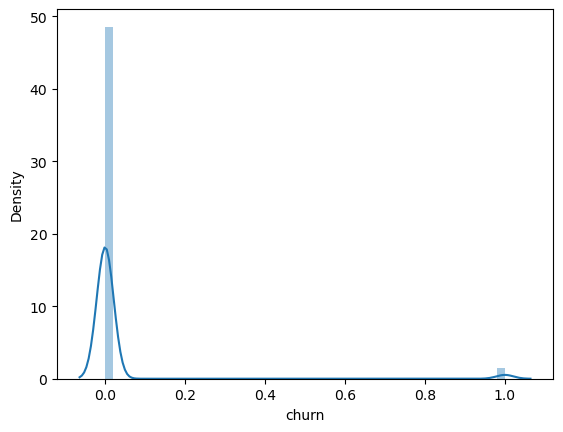

In [82]:
sns.distplot(telecom9['churn'])
plt.show()

In [83]:
## getting the columns having single values again
single_valued_columns = []
for column in telecom9.columns:
    if len(telecom9[column].unique()) == 1:
        single_valued_columns.append(column)

In [84]:
len(single_valued_columns)

20

In [85]:
telecom9 = telecom9.drop(single_valued_columns, axis = 1)
telecom9.shape

(28163, 49)

#### After removing the single value columns we now have 49 columns for model building and model prediction. We will first do Exploratory Data Analysis of the final data and draw insights from it. 

# Exploratory Data Analysis 

In [86]:
telecom9.columns

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'ic_others_6', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn',
       'total_mou_6', 'total_mou_7', 'total_mou_8', 'month_6_ic_mou',
       'month_6_og_mou', 'month_7_ic_mou', 'month_7_og_mou'],
      dtype='object')

In [87]:
telecom9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28163 entries, 7 to 99997
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loc_og_t2t_mou_8    28163 non-null  float64
 1   loc_og_t2m_mou_8    28163 non-null  float64
 2   loc_og_t2f_mou_8    28163 non-null  float64
 3   loc_og_t2c_mou_8    28163 non-null  float64
 4   loc_og_mou_8        28163 non-null  float64
 5   std_og_t2t_mou_8    28163 non-null  float64
 6   std_og_t2m_mou_8    28163 non-null  float64
 7   spl_og_mou_8        28163 non-null  float64
 8   loc_ic_t2t_mou_8    28163 non-null  float64
 9   loc_ic_t2f_mou_8    28163 non-null  float64
 10  std_ic_t2t_mou_8    28163 non-null  float64
 11  std_ic_t2f_mou_8    28163 non-null  float64
 12  std_ic_mou_8        28163 non-null  float64
 13  total_ic_mou_8      28163 non-null  float64
 14  ic_others_6         28163 non-null  float64
 15  ic_others_8         28163 non-null  float64
 16  total_rec

#### Details for Month 6 

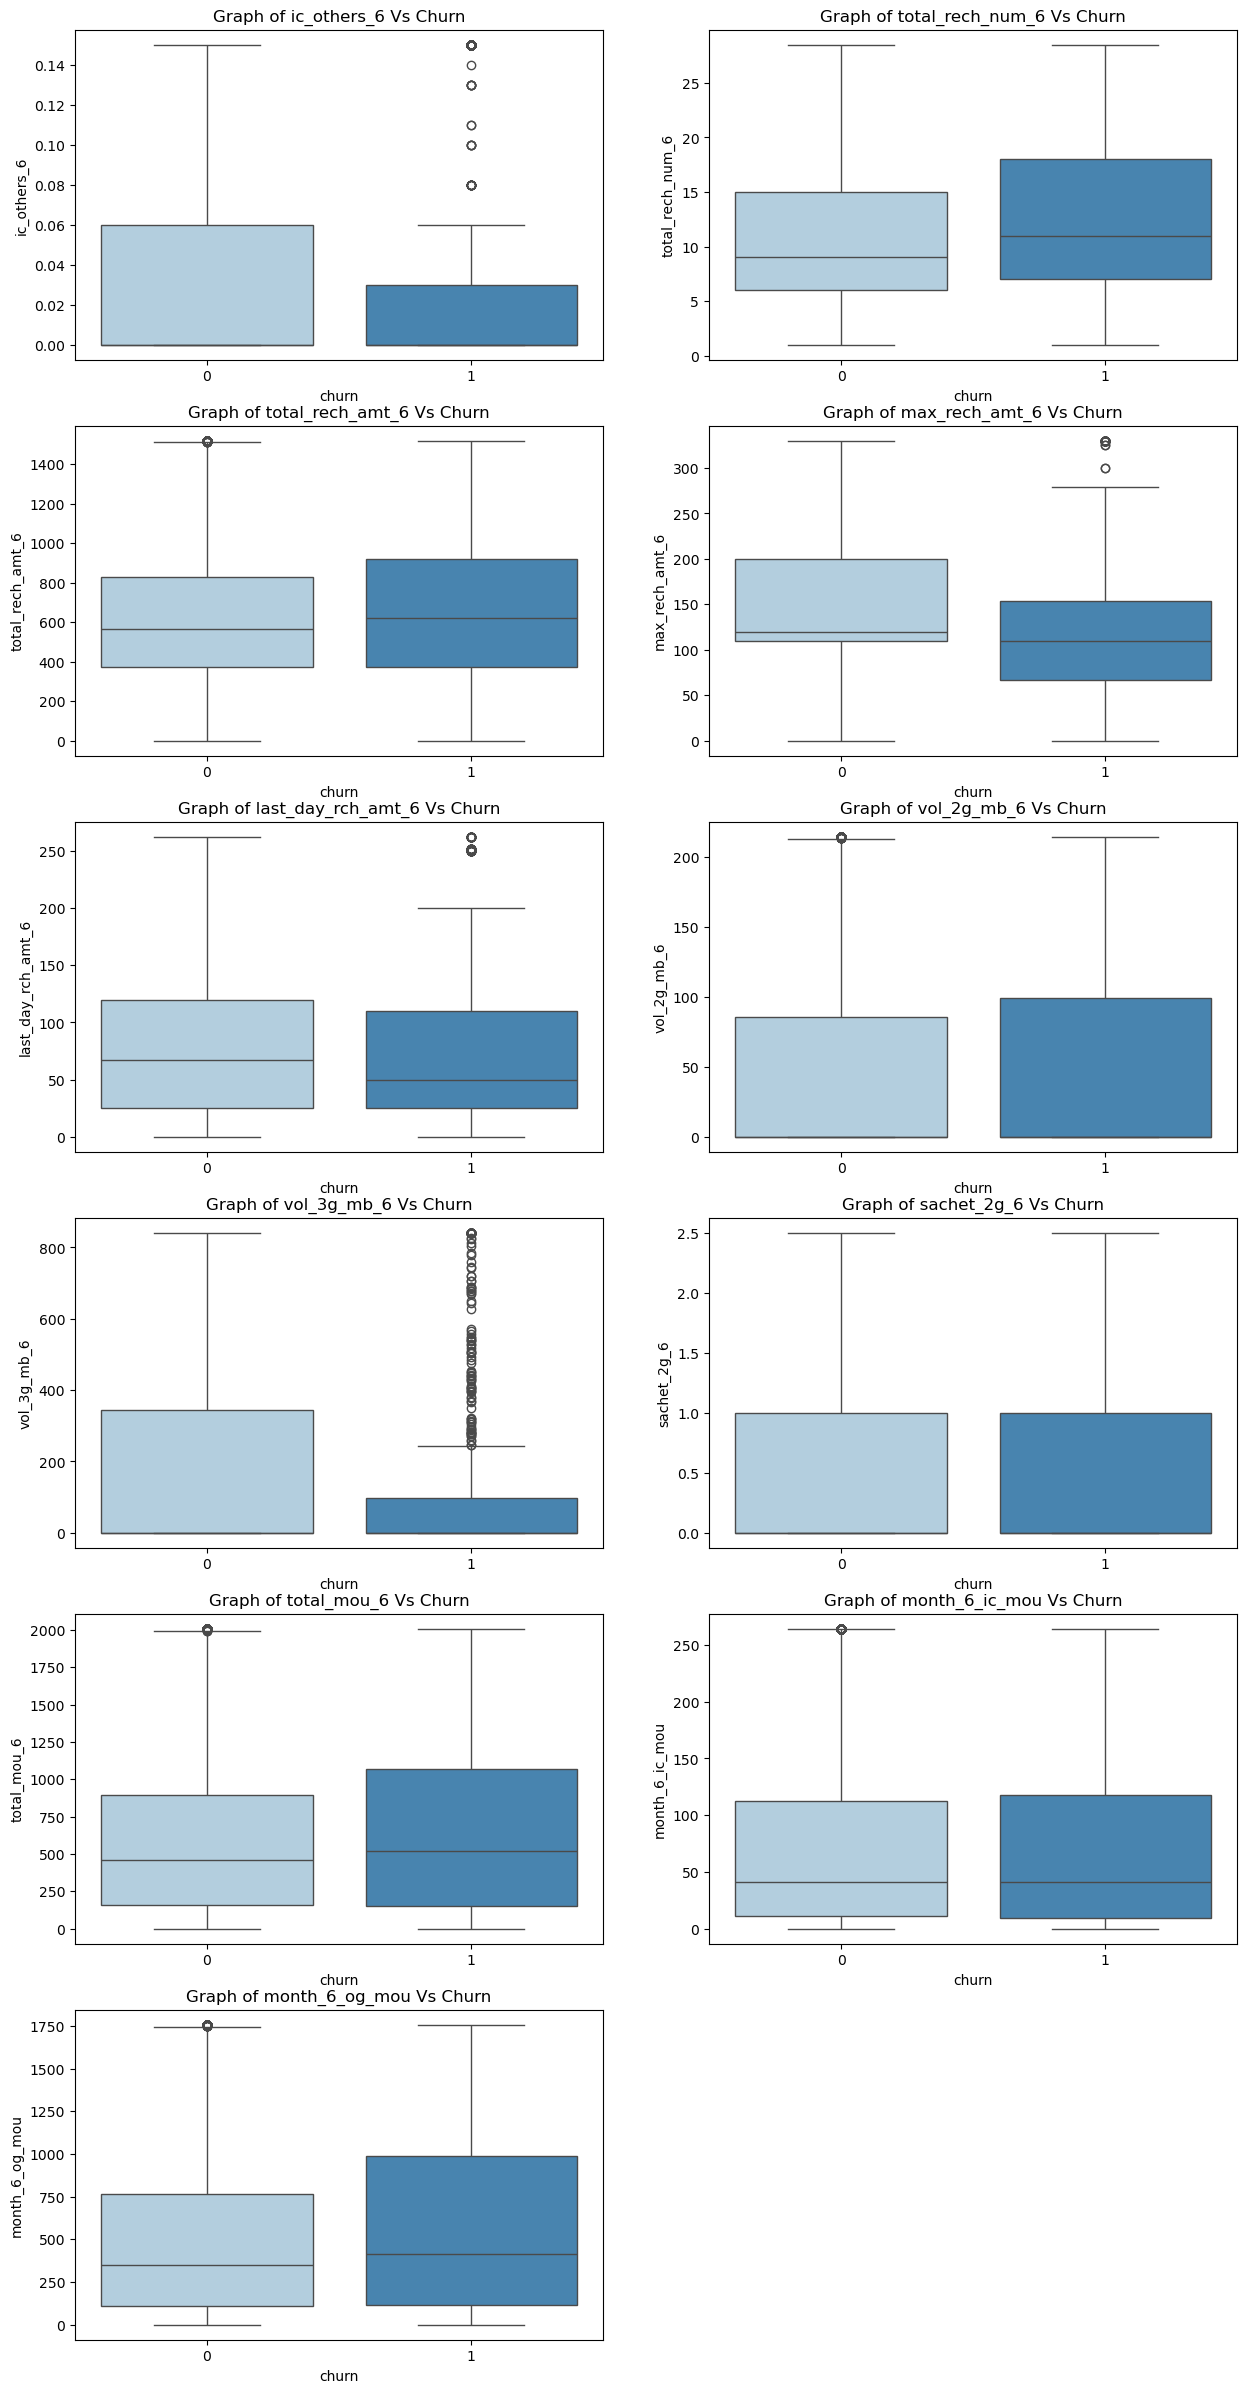

In [88]:
month_6_col = [col for col in telecom9.columns if '6' in col]

plt.figure(figsize=[15, 30])
for ind, col in enumerate(month_6_col):
    row = len(month_6_col)//2 + 1
    if col != 'churn':
        plt.subplot(row, 2, ind+1)
        sns.boxplot(y = col, data = telecom9, x = 'churn', palette="Blues")
        plt.xlabel('churn')
        plt.title(f'Graph of {col} Vs Churn')
plt.show()

#### Details for Month 7

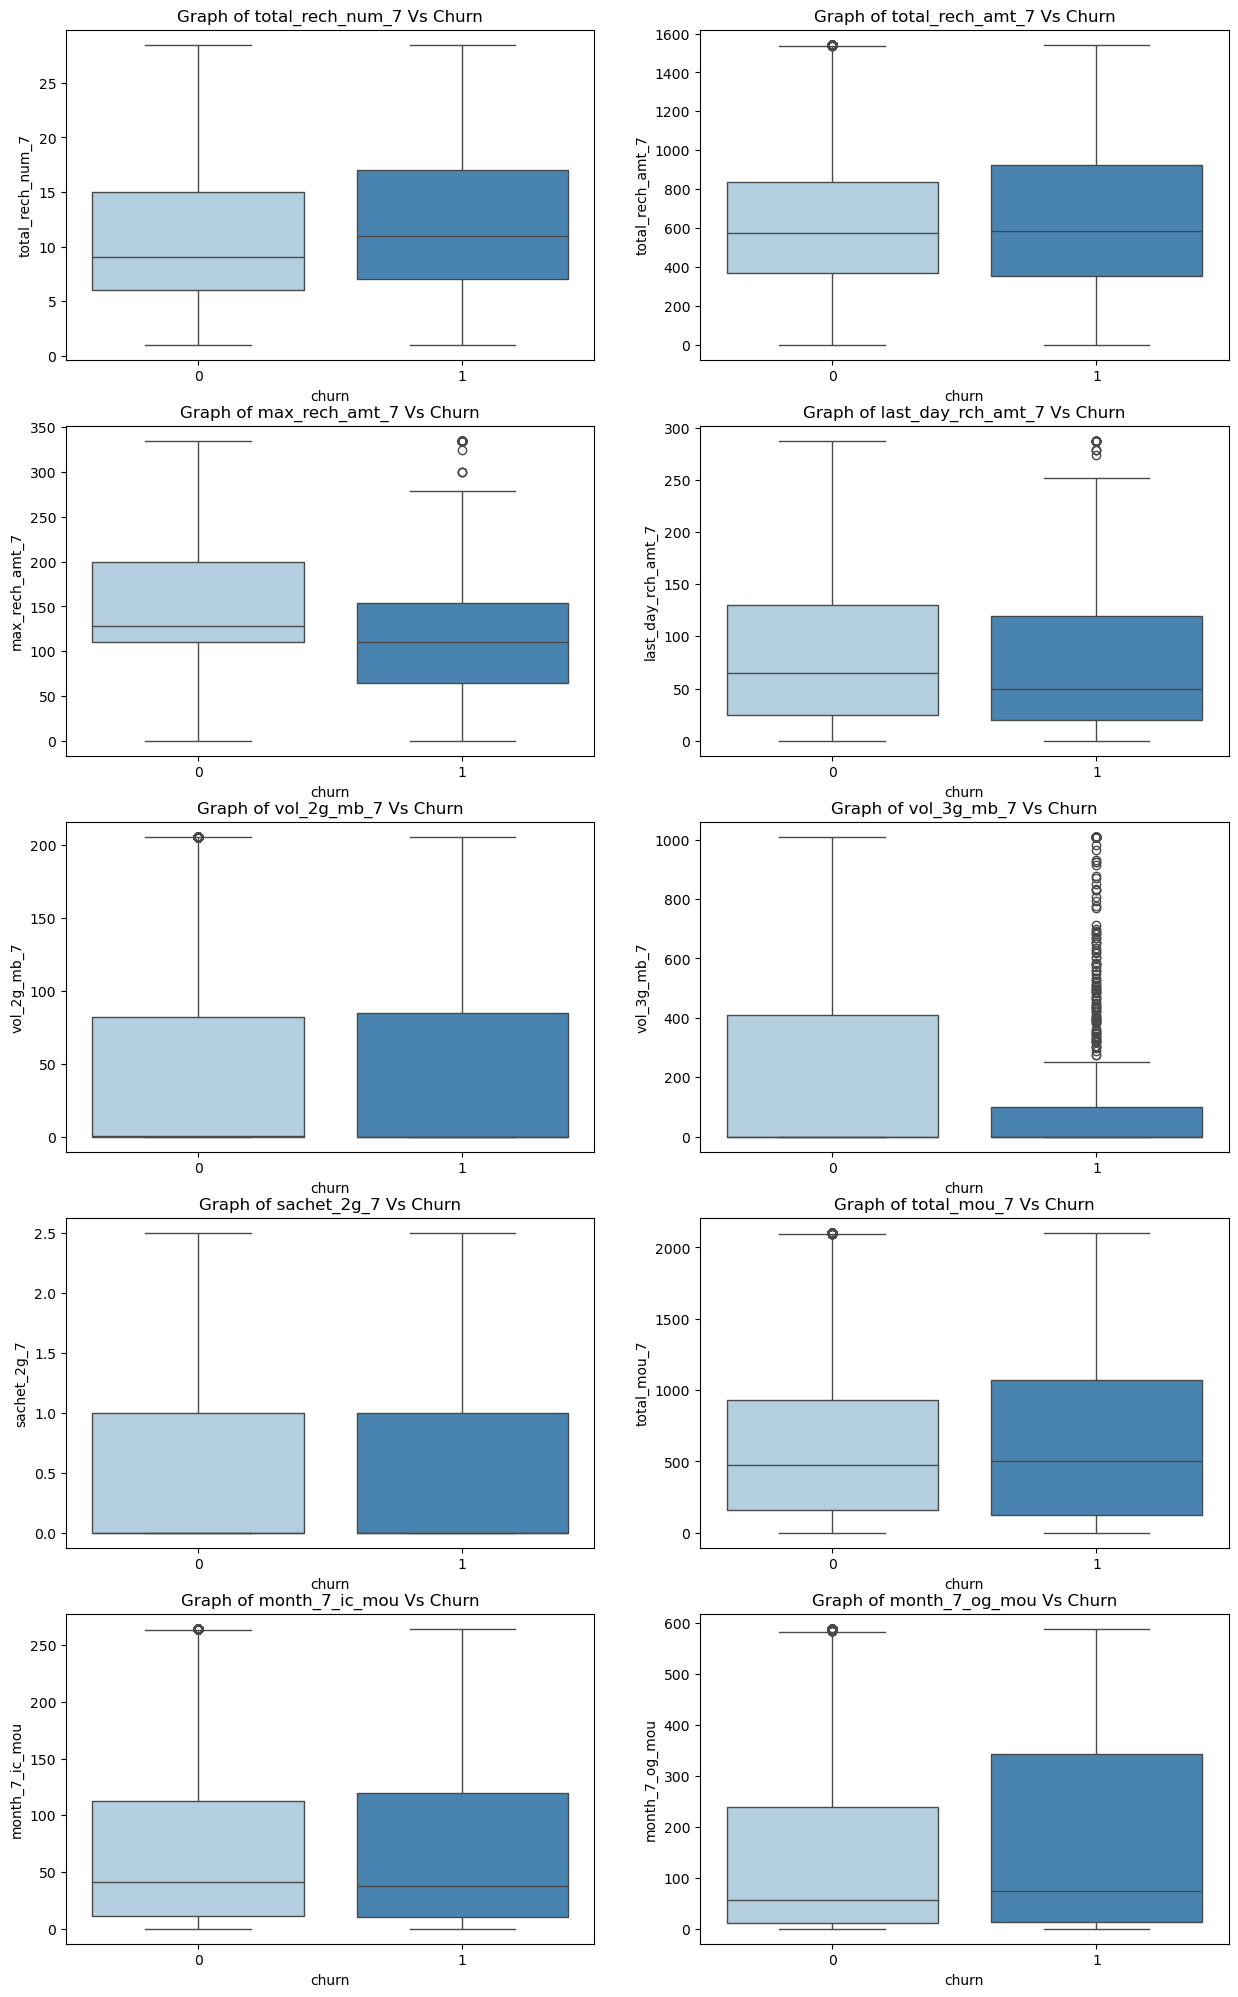

In [89]:
month_7_col = [col for col in telecom9.columns if '7' in col]

plt.figure(figsize=[15, 30])
for ind, col in enumerate(month_7_col):
    row = len(month_7_col)//2 + 1
    if col != 'churn':
        plt.subplot(row, 2, ind+1)
        sns.boxplot(y = col, data = telecom9, x = 'churn', palette="Blues")
        plt.xlabel('churn')
        plt.title(f'Graph of {col} Vs Churn')
plt.show()

#### Details for Month 8

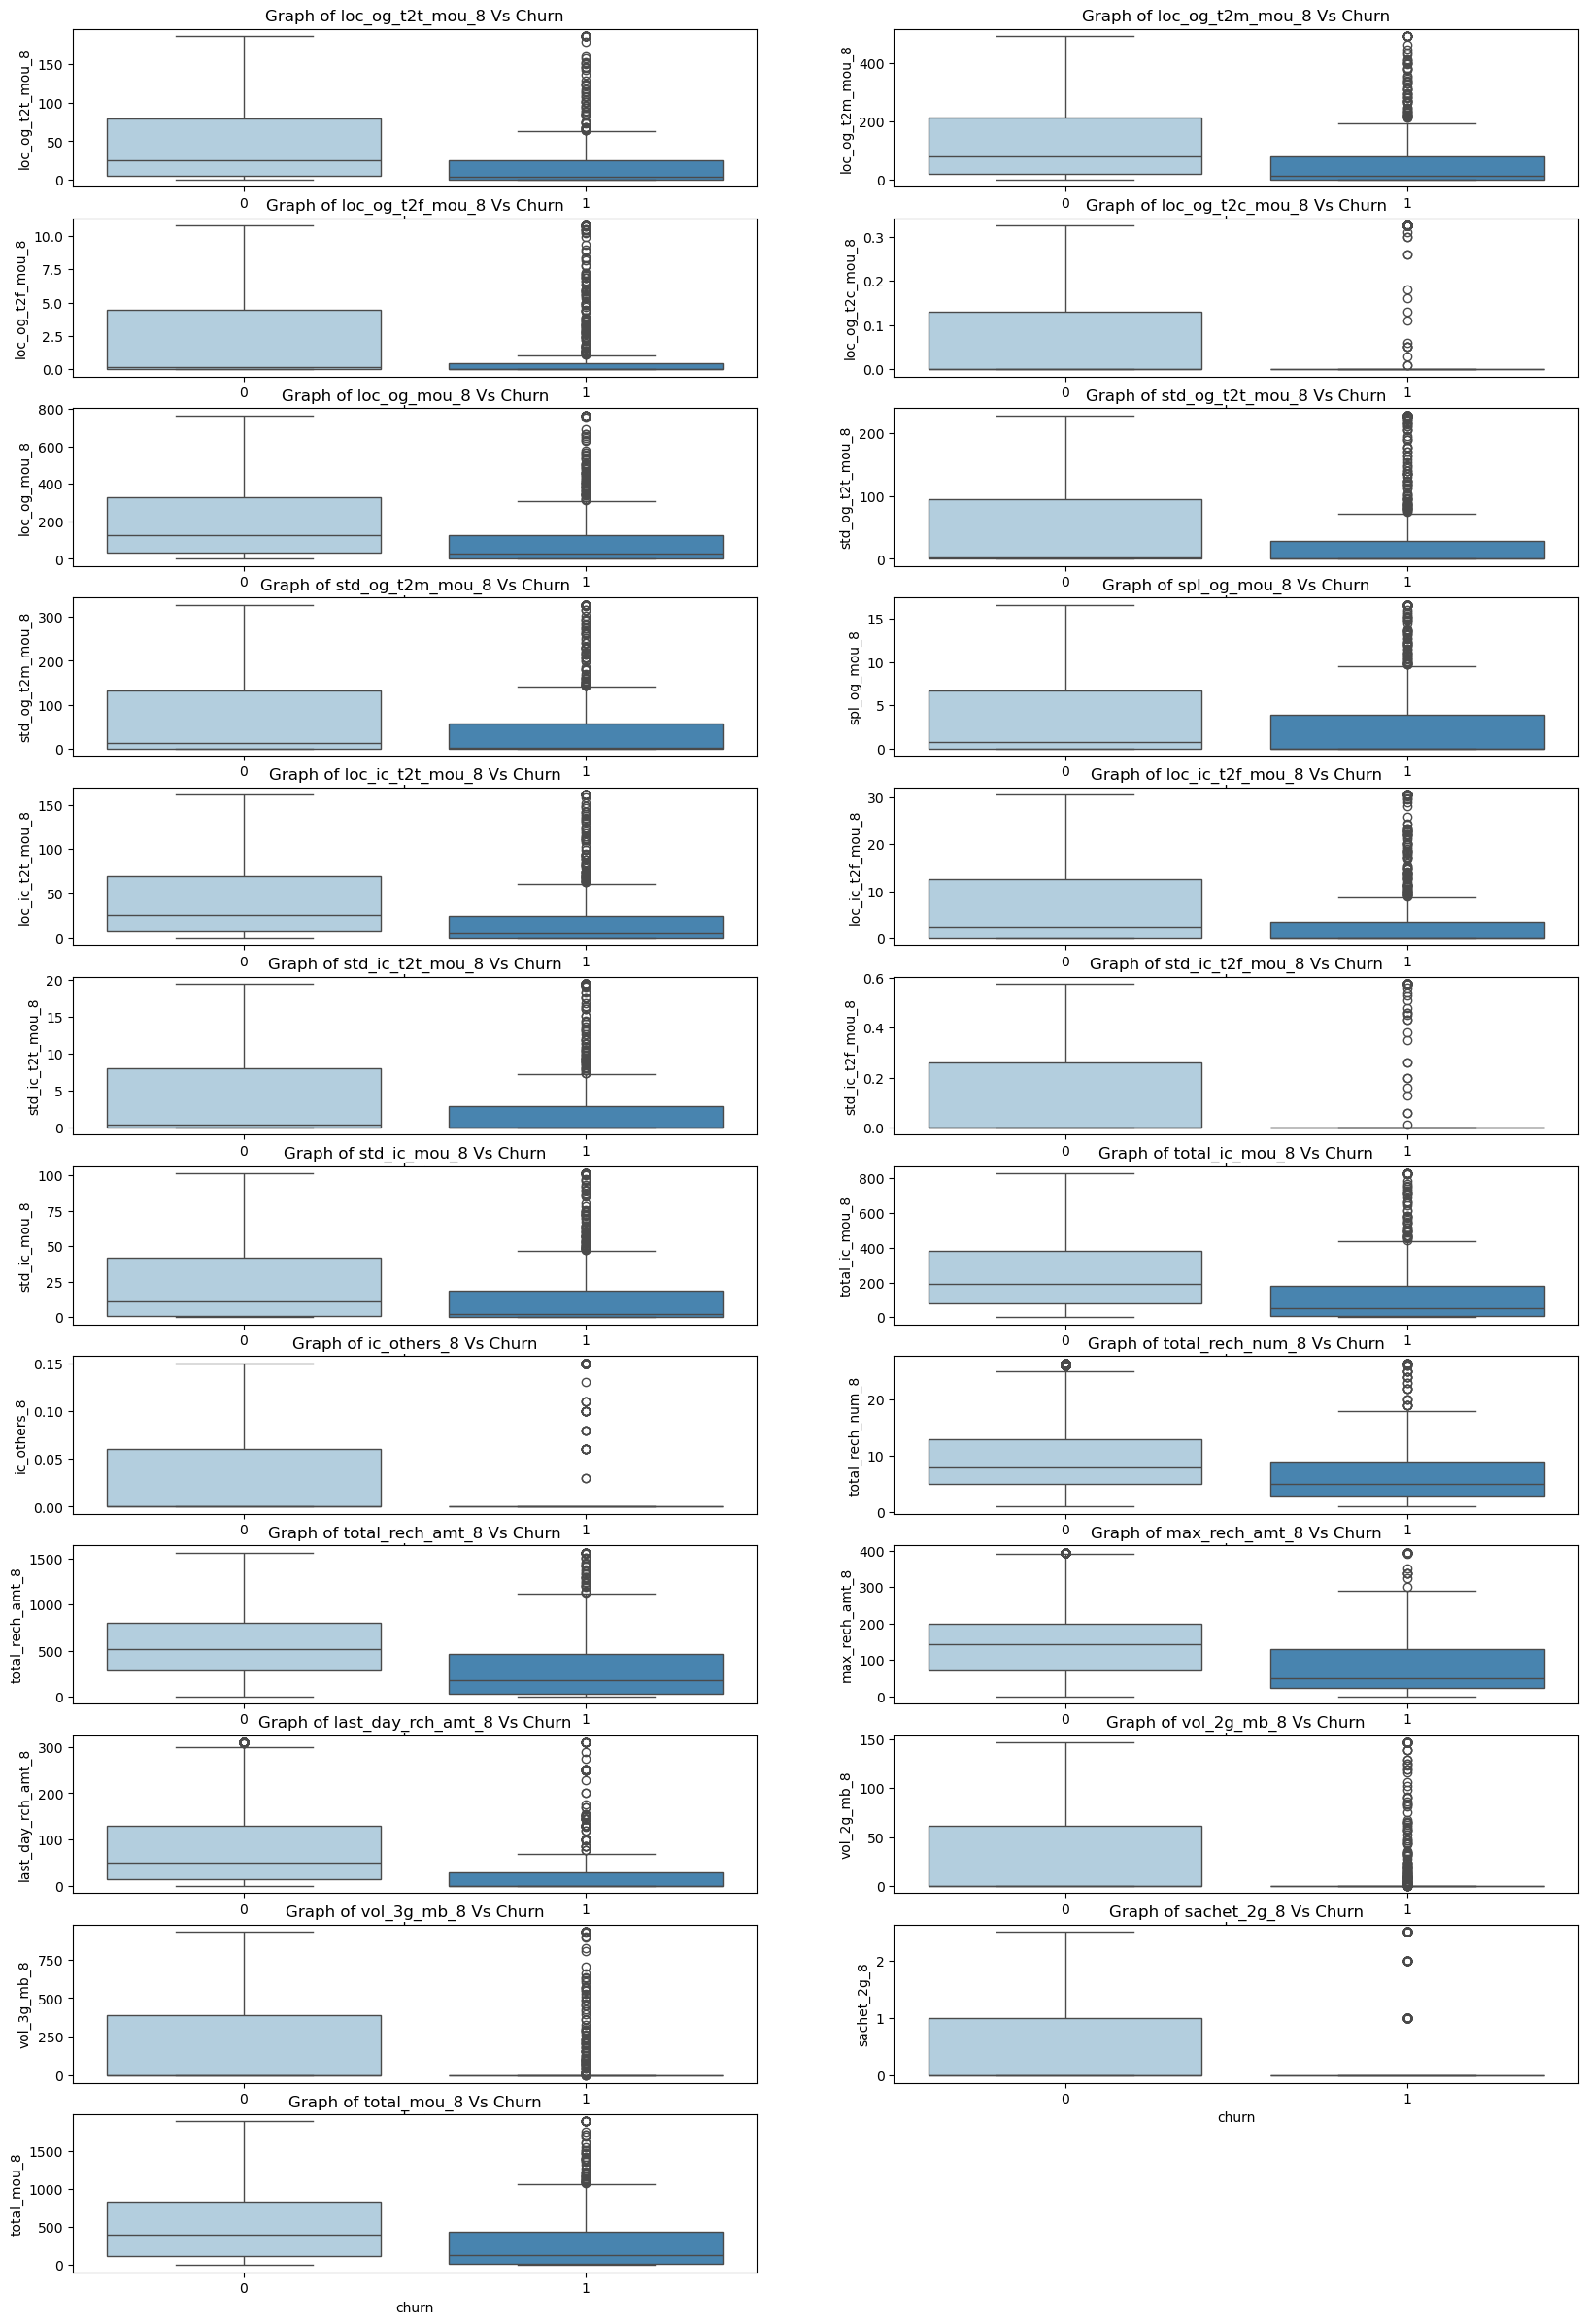

In [90]:
month_8_col = [col for col in telecom9.columns if '8' in col]

plt.figure(figsize=[20, 30])
for ind, col in enumerate(month_8_col):
    row = len(month_8_col)//2 + 1
    if col != 'churn':
        plt.subplot(row, 2, ind+1)
        sns.boxplot(y = col, data = telecom9, x = 'churn', palette="Blues")
        plt.xlabel('churn')
        plt.title(f'Graph of {col} Vs Churn')
plt.show()

#### Features not related to 6th, 7th and 8th months 

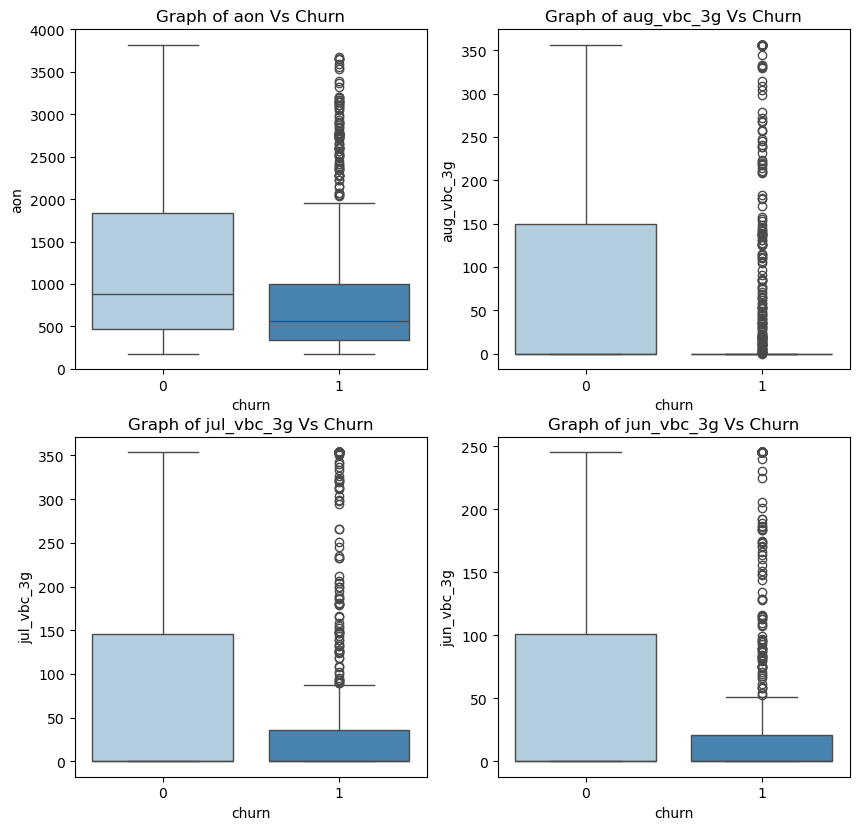

In [91]:
cols = [col for col in telecom9.columns if '6' not in col and '7' not in col and '8' not in col]

plt.figure(figsize=[10, 15])
for ind, col in enumerate(cols):
    row = len(cols)//2 + 1
    if col != 'churn':
        plt.subplot(row, 2, ind+1)
        sns.boxplot(y = col, data = telecom9, x = 'churn', palette="Blues")
        plt.xlabel('churn')
        plt.title(f'Graph of {col} Vs Churn')
plt.show()

### From the above visualisation of variables related to 6th, 7th and 8th month, these are the findings:

- The median of the **total recharge amount(total_rech_amt)** for month 6 is more for churners than non churners but as we go to month 7, the median almost becomes equal and then further in 8th month the median of total recharge amount for churners decreases significantly. 

- We found that **volume of 2g(vol_2g_mb)** usage is same for churners and non churners in month 6 and 7 which drastically goes down to median as zero in the 8th month for churners. Interesting thing to note here is that, the volume of 3g usage is comparatively less from volume of 2g even in the good phase for customers who are churning.

- We also find that the **total outgoing minutes of usage(og_mou)** is very less for churners in 8th month for all types of service such as local(loc), standard(std) and special(spl). 

- The age of network(aon) that is the number of days customer is associated with the telecom is approximately 600 days as median for churners and and 900 days median for non churners. Though we also see that all the churn customers are associated with a maximum(100 percentile) of 2000 days with some outliers but non churners are associated for approximately 4000 days(100 percentile). Thus, the variable 'aon' is an important feature to determine the behaviour of a customer who is about to churn.

- We see that **total number of recharges(total_rech_num)** for the good phase months shows promising data from churners as well as non churners though it decreses in the 8th month for churners. 

- Majorly we can also say that the incoming and outgoing services are consequently decreasing in 8th month for customers who churn showing their churn behaviour. 

In [92]:
sachet = [col for col in telecom9.columns if 'sachet' in col]
sachet

['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']

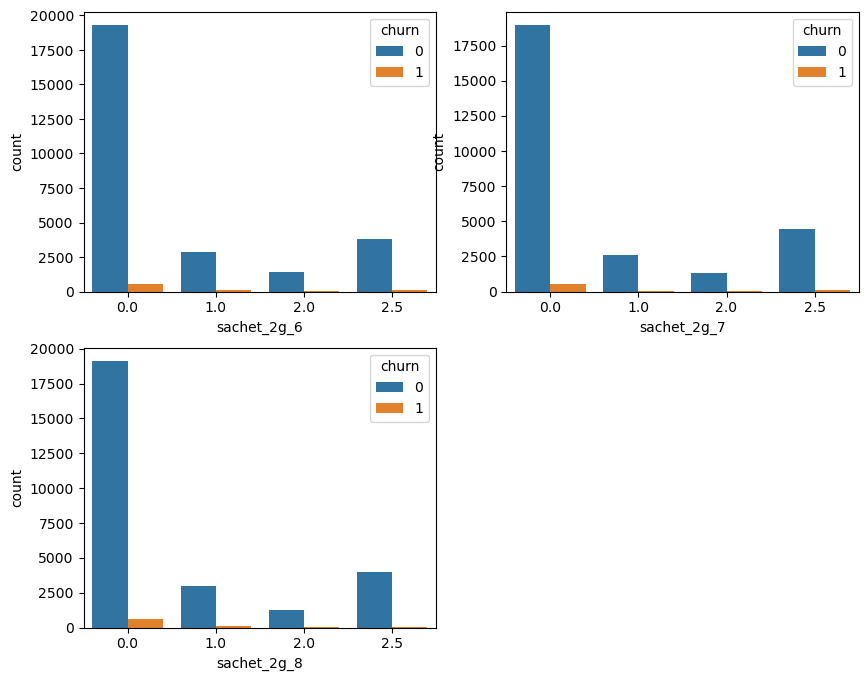

In [93]:
plt.figure(figsize = (10, 8))
for i, col in enumerate(sachet):
    
    plt.subplot(2, 2, i+1)
    sns.countplot(data = telecom9, x = col, hue = 'churn')
plt.show()

#### From above graph of **'sachet_2g'** that is availing **Service schemes with validity smaller than a month** for 6th, 7th and 8th month, we can not draw any conclusive pattern for churn customers. 

In [94]:
month_6_col_with_churn = month_6_col.copy()
month_6_col_with_churn.append('churn')

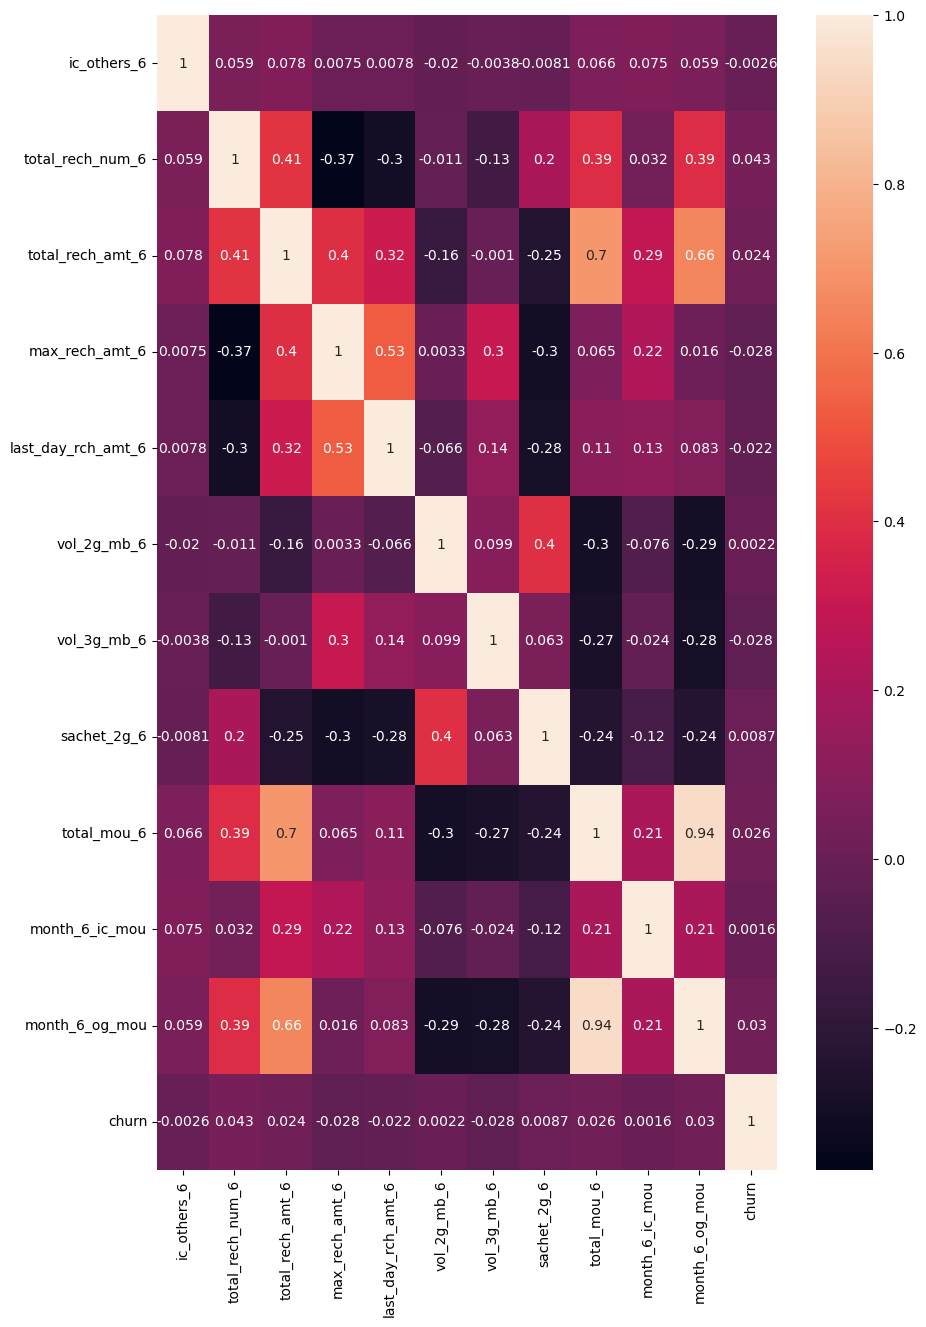

In [95]:
plt.figure(figsize=(10, 15))
sns.heatmap(telecom9[month_6_col_with_churn].corr(), annot = True)
plt.show()

In [96]:
month_7_col_with_churn = month_7_col.copy()
month_7_col_with_churn.append('churn')

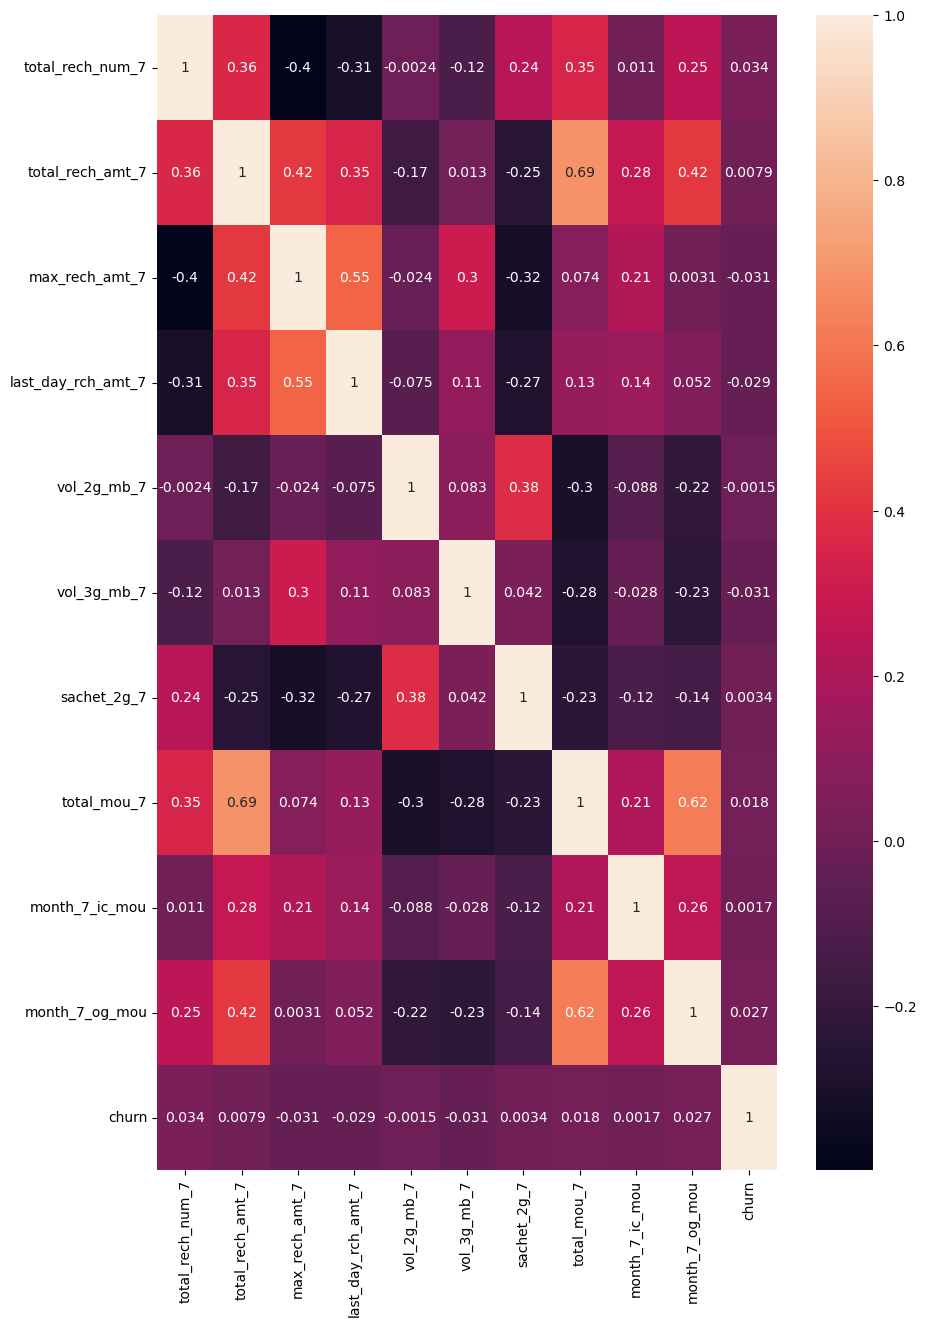

In [97]:
plt.figure(figsize=(10, 15))
sns.heatmap(telecom9[month_7_col_with_churn].corr(), annot = True)
plt.show()

In [98]:
month_8_col_with_churn = month_8_col.copy()
month_8_col_with_churn.append('churn')

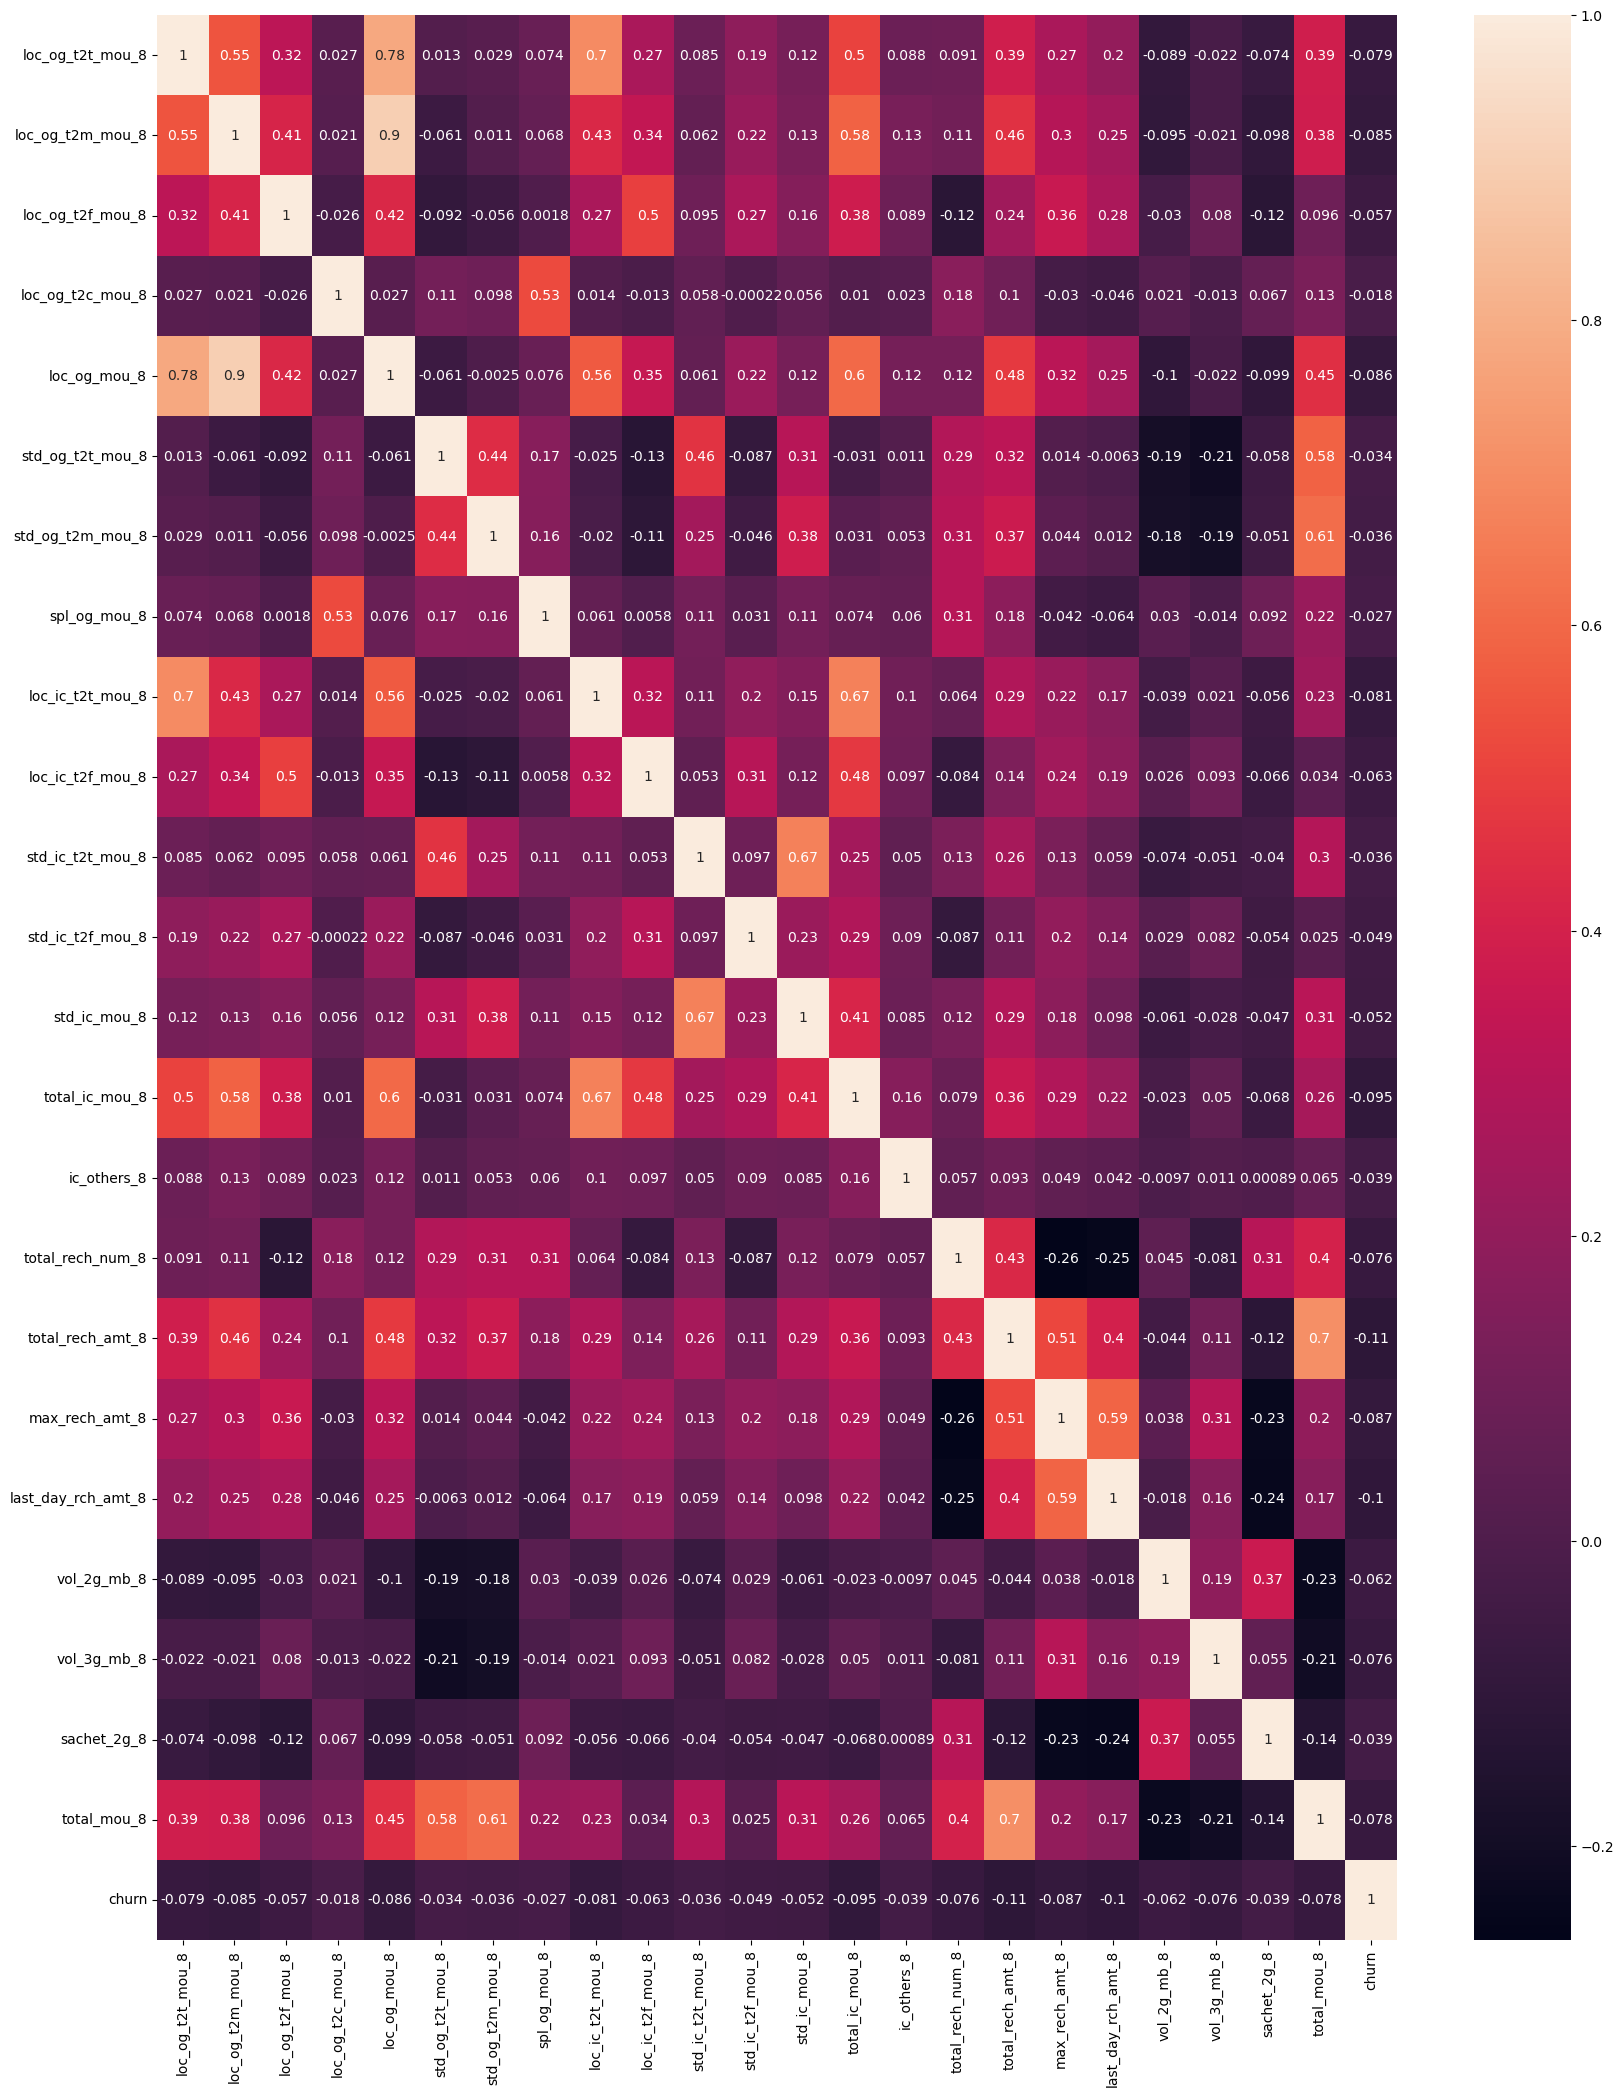

In [99]:
plt.figure(figsize=(20, 25))
sns.heatmap(telecom9[month_8_col_with_churn].corr(), annot = True)
plt.show()

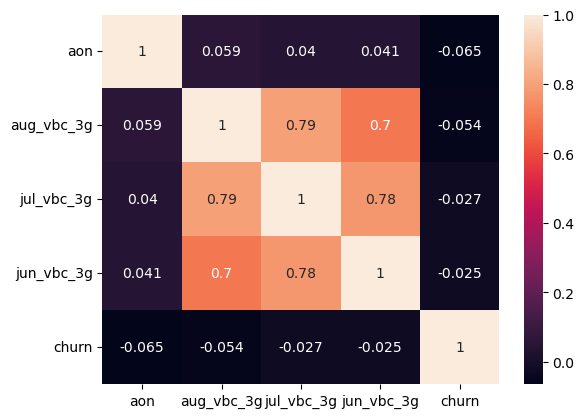

In [100]:
sns.heatmap(telecom9[cols].corr(), annot = True)
plt.show()

#### From the above heatmaps we do not find any feature very strongly correlated to 'churn' but very small correlation with 'max_rech_amt_8' and 'last_dat_rch_amt_8'. Though together these features might give high correlation with churn which we will see in model building.

## Model Building without PCA and Data Imbalance Technique 

In [101]:
churn_data = telecom9.copy()

#### Train Test Split and Scaling the variables 

In [102]:
X = churn_data.drop('churn', axis = 1)
y = churn_data['churn']

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [104]:
# splitting the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42, stratify = y)

In [105]:
X_train.shape, X_test.shape

((22530, 48), (5633, 48))

In [106]:
# standardizing the features 
scaler = MinMaxScaler()
cols = X.columns

X_train[cols] = scaler.fit_transform(X_train[cols]) # scaling the train variables 
X_test[cols] = scaler.transform(X_test[cols]) # scaling the test variables 

In [107]:
X_train.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_mou_6,total_mou_7,total_mou_8,month_6_ic_mou,month_6_og_mou,month_7_ic_mou,month_7_og_mou
39075,0.180204,0.185310,0.134571,0.0,0.164968,0.000000,0.000000,0.080120,0.248275,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.181818,0.363636,0.196078,0.123806,0.237277,0.164593,0.296970,0.292537,0.248416,0.114286,0.173913,0.096774,0.081394,0.044944,0.073803,0.929045,0.477068,0.383837,0.4,0.8,0.4,0.382602,0.629438,1.000000,1.0,0.026064,0.043246,0.066781,0.049380,0.023160,0.000000,0.006496
84712,0.071087,0.068307,0.808353,0.0,0.072644,0.000000,0.000000,0.000000,0.047290,0.101307,0.000000,0.0,0.000000,0.082553,0.0,0.0,0.254545,0.145455,0.117647,0.308199,0.282010,0.140989,0.466667,0.459701,0.390368,0.586667,0.535652,0.496774,0.945120,0.411248,1.000000,1.000000,0.879990,0.439783,0.0,0.0,0.0,0.587095,0.554615,0.704669,1.0,0.067238,0.029600,0.029405,0.000000,0.032700,0.017805,0.004421
86743,0.360408,0.526034,0.884455,0.0,0.438426,0.095172,0.953203,0.116265,0.127077,0.184967,1.000000,0.0,0.689594,0.401686,1.0,1.0,0.436364,0.400000,0.274510,0.706618,0.739060,0.382775,0.909091,1.000000,0.633714,0.000000,0.000000,0.483871,0.261197,0.301099,0.600289,1.000000,1.000000,0.434018,0.0,0.0,0.0,0.097300,1.000000,1.000000,1.0,0.589225,0.583187,0.401180,1.000000,0.627695,1.000000,1.000000
39763,0.334893,0.412853,0.149420,0.0,0.349158,0.000000,0.000000,0.122892,1.000000,1.000000,0.168638,0.0,0.157921,0.726099,1.0,1.0,0.290909,0.145455,0.196078,0.453079,0.242464,0.347049,0.466667,0.459701,0.633714,0.586667,0.535652,0.806452,1.000000,1.000000,0.094890,0.000000,0.013333,0.338547,0.0,0.0,0.0,0.648664,0.433888,0.029570,0.0,0.134800,0.112521,0.141350,0.160023,0.108994,0.093601,0.013383
30511,0.000000,0.043919,0.000000,0.0,0.028219,0.000000,0.000000,0.068072,0.004085,0.013072,0.000000,0.0,0.000000,0.046736,0.0,0.0,0.290909,0.945455,0.470588,0.131709,0.276175,0.111643,0.303030,0.328358,0.076046,0.076190,0.086957,0.080645,0.000000,0.034692,1.000000,0.000000,0.792085,0.114932,0.0,1.0,1.0,0.121487,0.191086,0.639757,0.0,0.084011,0.050640,0.011425,0.049418,0.093108,0.039429,0.015152


### Applying Logistic Regression

In [108]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [109]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [110]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))


Precision score: 0.25
Recall score: 0.006289308176100629
f1 score: 0.012269938650306749
accuracy score: 0.9714184271258655
Classification report               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5474
           1       0.25      0.01      0.01       159

    accuracy                           0.97      5633
   macro avg       0.61      0.50      0.50      5633
weighted avg       0.95      0.97      0.96      5633

Confusion Matrix [[5471    3]
 [ 158    1]]


In [111]:
from sklearn.metrics import RocCurveDisplay

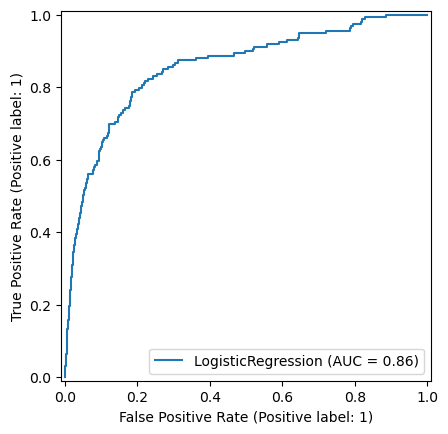

In [112]:
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

#### From the above Logistic Regression model we see that our model is able to predict class 0 i.e customers who have not churned properly but it is not able to predict for customers who have churned due to data imbalance. So, we will apply data imbalance technique, SMOTE and again apply the algorithm to see the performance

### Data Imbalance Technique - SMOTE 

In [113]:
# Updating libraries to ensure compatibility for SMOTE
!pip install --upgrade scikit-learn imbalanced-learn

In [191]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(k_neighbors=5, random_state=42)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
print(len(X_resampled_smt))
print(sorted(Counter(y_resampled_smt).items()))

43788
[(0, 21894), (1, 21894)]


## Logistic Regression on balanced dataset

In [115]:
log_reg_smt = LogisticRegression(random_state=42)
log_reg_smt.fit(X_resampled_smt, y_resampled_smt)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [116]:
y_test_pred = log_reg_smt.predict(X_test)

In [117]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Precision score: 0.09984025559105432
Recall score: 0.7861635220125787
f1 score: 0.1771793054571226
accuracy score: 0.7938931297709924
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.79      0.18       159

    accuracy                           0.79      5633
   macro avg       0.55      0.79      0.53      5633
weighted avg       0.97      0.79      0.86      5633

Confusion Matrix [[4347 1127]
 [  34  125]]


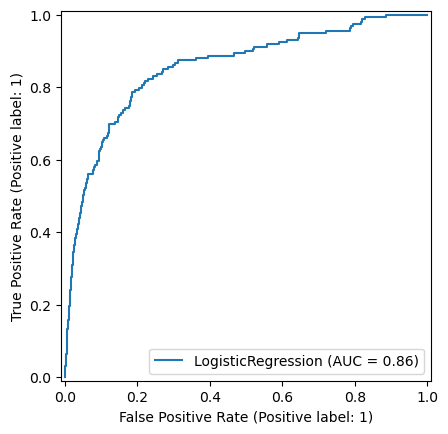

In [118]:
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

#### We see that our recall has increased. Though precision has decreased to 10%. In this business problem we need our recall to be high. As it is important to identify the customers who will churn than the ones who will not churn. 

### Feature Selection using RFE

In [119]:
from sklearn.feature_selection import RFE

In [120]:
n_features = [10, 15, 20, 23, 25, 30]

Number of features used: 10
Precision score: 0.09428359317000742
Recall score: 0.7987421383647799
f1 score: 0.16865869853917662
accuracy score: 0.7777383277116989
Classification report               precision    recall  f1-score   support

           0       0.99      0.78      0.87      5474
           1       0.09      0.80      0.17       159

    accuracy                           0.78      5633
   macro avg       0.54      0.79      0.52      5633
weighted avg       0.97      0.78      0.85      5633

Confusion Matrix [[4254 1220]
 [  32  127]]


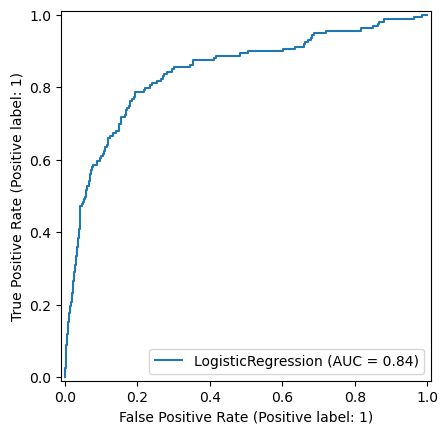

-----------------------------------------------------------------------------------------------------
Number of features used: 15
Precision score: 0.10007880220646179
Recall score: 0.7987421383647799
f1 score: 0.17787114845938376
accuracy score: 0.791585300905379
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.80      0.18       159

    accuracy                           0.79      5633
   macro avg       0.55      0.80      0.53      5633
weighted avg       0.97      0.79      0.86      5633

Confusion Matrix [[4332 1142]
 [  32  127]]


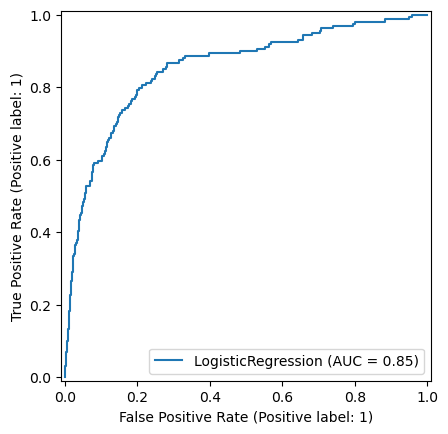

-----------------------------------------------------------------------------------------------------
Number of features used: 20
Precision score: 0.0999213217938631
Recall score: 0.7987421383647799
f1 score: 0.17762237762237762
accuracy score: 0.7912302503106693
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.80      0.18       159

    accuracy                           0.79      5633
   macro avg       0.55      0.79      0.53      5633
weighted avg       0.97      0.79      0.86      5633

Confusion Matrix [[4330 1144]
 [  32  127]]


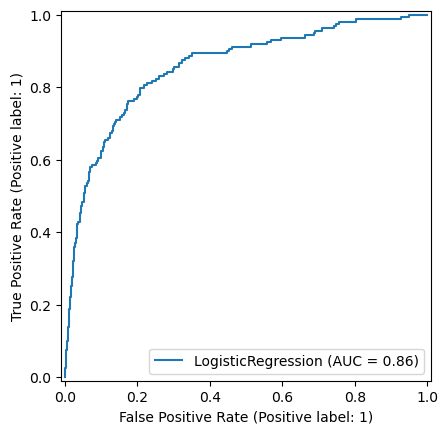

-----------------------------------------------------------------------------------------------------
Number of features used: 23
Precision score: 0.10007880220646179
Recall score: 0.7987421383647799
f1 score: 0.17787114845938376
accuracy score: 0.791585300905379
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.80      0.18       159

    accuracy                           0.79      5633
   macro avg       0.55      0.80      0.53      5633
weighted avg       0.97      0.79      0.86      5633

Confusion Matrix [[4332 1142]
 [  32  127]]


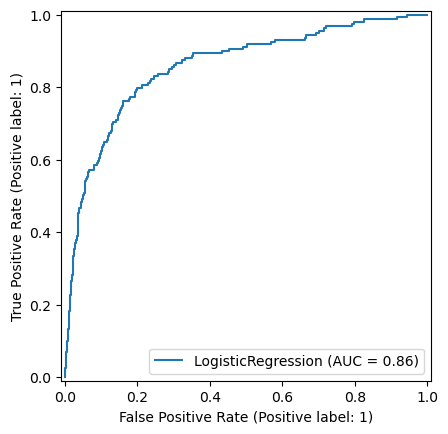

-----------------------------------------------------------------------------------------------------
Number of features used: 25
Precision score: 0.09841269841269841
Recall score: 0.779874213836478
f1 score: 0.17477096546863988
accuracy score: 0.7921178767974436
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.78      0.17       159

    accuracy                           0.79      5633
   macro avg       0.55      0.79      0.53      5633
weighted avg       0.97      0.79      0.86      5633

Confusion Matrix [[4338 1136]
 [  35  124]]


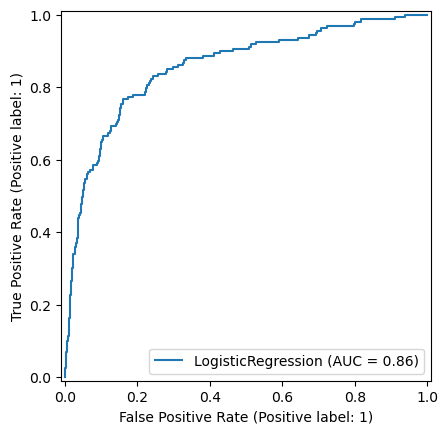

-----------------------------------------------------------------------------------------------------
Number of features used: 30
Precision score: 0.0981012658227848
Recall score: 0.779874213836478
f1 score: 0.17427969079409697
accuracy score: 0.7914077756080241
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.78      0.17       159

    accuracy                           0.79      5633
   macro avg       0.55      0.79      0.53      5633
weighted avg       0.97      0.79      0.86      5633

Confusion Matrix [[4334 1140]
 [  35  124]]


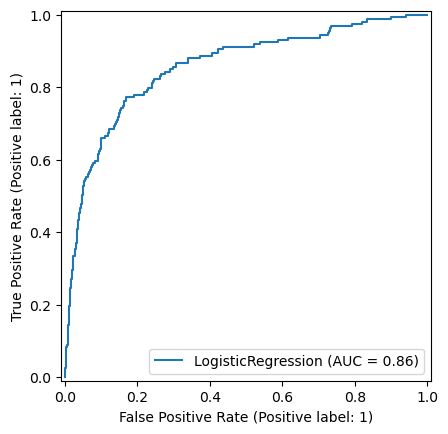

-----------------------------------------------------------------------------------------------------


In [121]:
for n in n_features:
    log_reg_rfe = LogisticRegression(random_state=42)
    log_reg_rfe.fit(X_resampled_smt, y_resampled_smt)

    rfe = RFE(log_reg_rfe, n_features_to_select=n)
    rfe.fit(X_resampled_smt, y_resampled_smt)

    cols = X_resampled_smt.columns[rfe.support_]

    X_resampled_smt_rfe = X_resampled_smt[cols]

    log_reg_rfe = LogisticRegression(random_state=42)
    log_reg_rfe.fit(X_resampled_smt_rfe, y_resampled_smt)

    X_test_rfe = X_test[cols]
    y_test_pred = log_reg_rfe.predict(X_test_rfe)

    print('Number of features used:', n)
    print('Precision score:', precision_score(y_test, y_test_pred))
    print('Recall score:', recall_score(y_test, y_test_pred))
    print('f1 score:', f1_score(y_test, y_test_pred))
    print('accuracy score:', accuracy_score(y_test, y_test_pred))
    print('Classification report',classification_report(y_test, y_test_pred))
    print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

    RocCurveDisplay.from_estimator(log_reg_rfe, X_test_rfe, y_test)
    plt.show()

    print('-----------------------------------------------------------------------------------------------------')

    

#### We see that 20 features are giving us the highest recall as 0.80 and highest AUC score as 0.86, so, we will go ahead with 20 features and tune the logistic model.

Trian Metrics:
Precision score: 0.8016719385449615
Recall score: 0.8103133278523796
f1 score: 0.8059694711975286
accuracy score: 0.8049237233945373
Classification report               precision    recall  f1-score   support

           0       0.81      0.80      0.80     21894
           1       0.80      0.81      0.81     21894

    accuracy                           0.80     43788
   macro avg       0.80      0.80      0.80     43788
weighted avg       0.80      0.80      0.80     43788

Confusion Matrix [[17505  4389]
 [ 4153 17741]]


Test Metrics:
Precision score: 0.0999213217938631
Recall score: 0.7987421383647799
f1 score: 0.17762237762237762
accuracy score: 0.7912302503106693
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.80      0.18       159

    accuracy                           0.79      5633
   macro avg       0.55      0.79      0.53      5633
weighted av

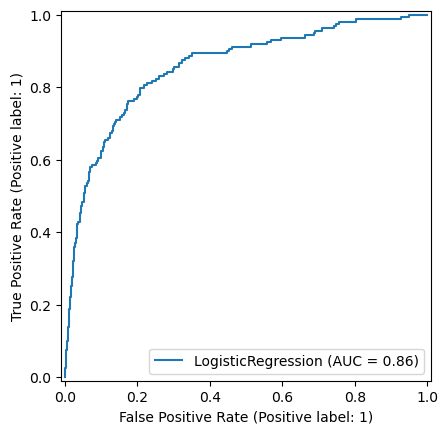

In [122]:
rfe = RFE(log_reg_rfe, n_features_to_select=20)
rfe.fit(X_resampled_smt, y_resampled_smt)

cols = X_resampled_smt.columns[rfe.support_]

X_resampled_smt_rfe = X_resampled_smt[cols]

log_reg_rfe = LogisticRegression(random_state=42)
log_reg_rfe.fit(X_resampled_smt_rfe, y_resampled_smt)

X_test_rfe = X_test[cols]
y_test_pred = log_reg_rfe.predict(X_test_rfe)

y_train_pred = log_reg_rfe.predict(X_resampled_smt_rfe)

print('Trian Metrics:')
print('Precision score:', precision_score(y_resampled_smt, y_train_pred))
print('Recall score:', recall_score(y_resampled_smt, y_train_pred))
print('f1 score:', f1_score(y_resampled_smt, y_train_pred))
print('accuracy score:', accuracy_score(y_resampled_smt, y_train_pred))
print('Classification report',classification_report(y_resampled_smt, y_train_pred))
print('Confusion Matrix',confusion_matrix(y_resampled_smt, y_train_pred), end = '\n')

print('\n')
print('Test Metrics:')
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

RocCurveDisplay.from_estimator(log_reg_rfe, X_test_rfe, y_test)
plt.show()

#### Logistic Regression Hyperparameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [124]:
param_grid = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['l1', 'l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [125]:
grid_search = GridSearchCV(estimator=log_reg_rfe, param_grid=param_grid, n_jobs=-1, verbose=1, cv = cv, scoring='accuracy', error_score=0)
grid_search.fit(X_resampled_smt_rfe, y_resampled_smt)

Fitting 30 folds for each of 50 candidates, totalling 1500 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [100, 10, ...], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",RepeatedStrat...andom_state=1)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter ca

In [126]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.804718 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [127]:
log_reg_best = grid_search.best_estimator_

In [128]:
X_test_rfe = X_test[cols]
y_test_pred = log_reg_best.predict(X_test_rfe)

In [129]:
y_train_pred = log_reg_best.predict(X_resampled_smt_rfe)
print('Train Metrics:')
print('Precision score:', precision_score(y_resampled_smt, y_train_pred))
print('Recall score:', recall_score(y_resampled_smt, y_train_pred))
print('f1 score:', f1_score(y_resampled_smt, y_train_pred))
print('accuracy score:', accuracy_score(y_resampled_smt, y_train_pred))
print('Classification report',classification_report(y_resampled_smt, y_train_pred))
print('Confusion Matrix',confusion_matrix(y_resampled_smt, y_train_pred))

Train Metrics:
Precision score: 0.801916644064732
Recall score: 0.8102676532383302
f1 score: 0.8060705198109779
accuracy score: 0.8050607472366859
Classification report               precision    recall  f1-score   support

           0       0.81      0.80      0.80     21894
           1       0.80      0.81      0.81     21894

    accuracy                           0.81     43788
   macro avg       0.81      0.81      0.81     43788
weighted avg       0.81      0.81      0.81     43788

Confusion Matrix [[17512  4382]
 [ 4154 17740]]


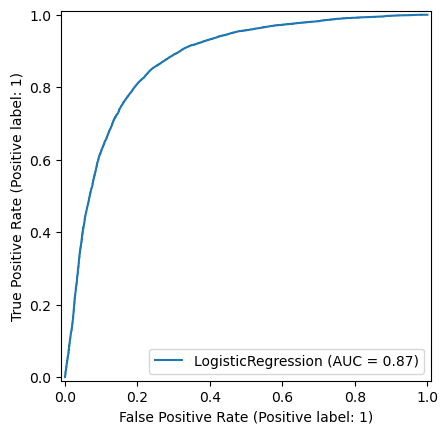

In [130]:
RocCurveDisplay.from_estimator(log_reg_best, X_resampled_smt_rfe, y_resampled_smt)

In [131]:
print('Test Metrics:')
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Test Metrics:
Precision score: 0.0999213217938631
Recall score: 0.7987421383647799
f1 score: 0.17762237762237762
accuracy score: 0.7912302503106693
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5474
           1       0.10      0.80      0.18       159

    accuracy                           0.79      5633
   macro avg       0.55      0.79      0.53      5633
weighted avg       0.97      0.79      0.86      5633

Confusion Matrix [[4330 1144]
 [  32  127]]


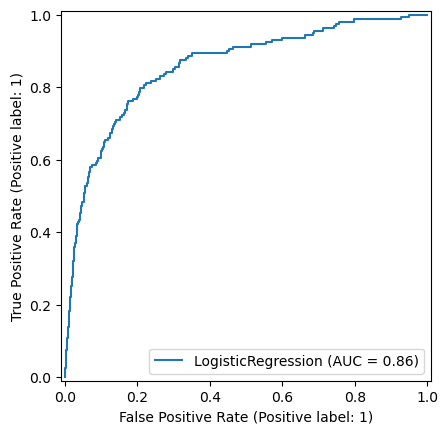

In [132]:
RocCurveDisplay.from_estimator(log_reg_best, X_test_rfe, y_test)

In [133]:
feature_importance = pd.DataFrame(X_test_rfe.columns, columns=['Feature'])
feature_importance['Importance'] = abs(log_reg_best.coef_[0])
feature_importance.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
4,total_rech_num_8,3.088336
9,last_day_rch_amt_8,2.520965
15,total_mou_7,2.475829
13,vol_3g_mb_8,2.319043
16,total_mou_8,2.243893
5,total_rech_amt_6,2.198171
3,total_rech_num_7,1.660569
2,total_ic_mou_8,1.599792
11,vol_2g_mb_8,1.482460
14,aon,1.418109


## Random Forest 

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_resampled_smt, y_resampled_smt)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [136]:
y_test_pred = rf.predict(X_test)

In [137]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Precision score: 0.2457627118644068
Recall score: 0.18238993710691823
f1 score: 0.20938628158844766
accuracy score: 0.9611219598792828
Classification report               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5474
           1       0.25      0.18      0.21       159

    accuracy                           0.96      5633
   macro avg       0.61      0.58      0.59      5633
weighted avg       0.96      0.96      0.96      5633

Confusion Matrix [[5385   89]
 [ 130   29]]


### Hyper-parameter tuning in Random Forest Classifier

In [138]:
param_grid = {
    'n_estimators' : list(range(50,200,40)),
    'max_features' : list(range(10,35,5)),
    'max_depth' : list(range(5, 20, 5))
}

In [139]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 4, n_jobs=-1, verbose=1, return_train_score = True)
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [5, 10, ...], 'max_features': [10, 15, ...], 'n_estimators': [50, 90, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",4
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the

In [140]:
rf_best = grid_search.best_estimator_

In [141]:
y_test_pred = rf_best.predict(X_test)

In [142]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Precision score: 0.22939068100358423
Recall score: 0.4025157232704403
f1 score: 0.2922374429223744
accuracy score: 0.9449671578199893
Classification report               precision    recall  f1-score   support

           0       0.98      0.96      0.97      5474
           1       0.23      0.40      0.29       159

    accuracy                           0.94      5633
   macro avg       0.61      0.68      0.63      5633
weighted avg       0.96      0.94      0.95      5633

Confusion Matrix [[5259  215]
 [  95   64]]


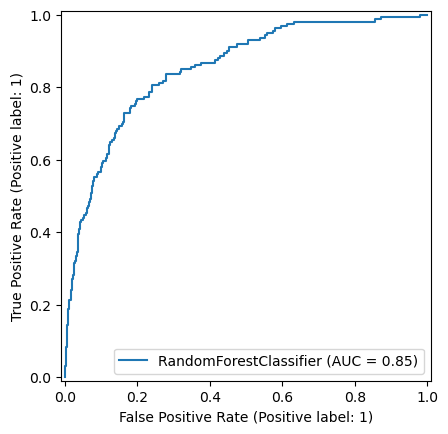

In [143]:
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)

## AdaBoost

In [144]:
from sklearn.ensemble import AdaBoostClassifier

In [145]:
adaboost = AdaBoostClassifier(n_estimators=40, random_state=42, learning_rate=0.1)
adaboost.fit(X_resampled_smt, y_resampled_smt)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",40
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [146]:
y_test_pred = adaboost.predict(X_test)

In [147]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Precision score: 0.07340025094102885
Recall score: 0.7358490566037735
f1 score: 0.13348545350827154
accuracy score: 0.7303390733179478
Classification report               precision    recall  f1-score   support

           0       0.99      0.73      0.84      5474
           1       0.07      0.74      0.13       159

    accuracy                           0.73      5633
   macro avg       0.53      0.73      0.49      5633
weighted avg       0.96      0.73      0.82      5633

Confusion Matrix [[3997 1477]
 [  42  117]]


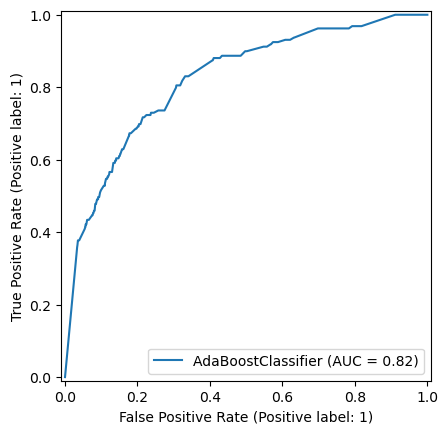

In [148]:
RocCurveDisplay.from_estimator(adaboost, X_test, y_test)

### Hyper-parameter Tuning in AdaBoost Classifier 

In [149]:
param_grid = {
    'n_estimators' : [50, 100, 150, 200, 500],
    'learning_rate' : [0.001, 0.01, 0.1]
}

In [150]:
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv = 4, n_jobs=-1, verbose=1, scoring = 'recall', return_train_score=True)
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",AdaBoostClass...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",4
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also d

In [151]:
grid_search.best_estimator_

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",500
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [152]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,11.293884,0.353100,0.261746,0.033057,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.591449,0.603508,0.600840,0.602667,0.599616,0.004813,15,0.603374,0.599354,0.597199,0.599635,0.599890,0.002221
1,24.492016,0.801880,0.519701,0.073031,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.591449,0.603508,0.602850,0.602667,0.600119,0.005015,13,0.603374,0.599354,0.598234,0.599635,0.600149,0.001934
2,36.227642,0.748346,0.678307,0.063189,0.001,150,"{'learning_rate': 0.001, 'n_estimators': 150}",0.591266,0.603508,0.602850,0.602667,0.600073,0.005094,14,0.603252,0.599354,0.598234,0.599635,0.600119,0.001883
3,47.529776,1.136233,0.874406,0.106830,0.001,200,"{'learning_rate': 0.001, 'n_estimators': 200}",0.591266,0.672574,0.670442,0.668250,0.650633,0.034310,12,0.603252,0.665976,0.665591,0.667418,0.650559,0.027321
4,121.422163,1.378488,2.251514,0.375424,0.001,500,"{'learning_rate': 0.001, 'n_estimators': 500}",0.658505,0.668920,0.670807,0.770369,0.692151,0.045402,10,0.670483,0.660557,0.666382,0.770341,0.691941,0.045402


In [153]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,106.645566,0.810654,1.638985,0.144967,0.10,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.810524,0.825872,0.820789,0.829741,0.821732,0.007207,1,0.827660,0.820413,0.819245,0.825883,0.823300,0.003552
12,36.411483,0.897012,0.758118,0.034075,0.10,150,"{'learning_rate': 0.1, 'n_estimators': 150}",0.785310,0.817650,0.803252,0.826270,0.808120,0.015526,2,0.804275,0.810243,0.800305,0.825091,0.809978,0.009415
13,47.012434,0.924781,0.721269,0.023270,0.10,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.799561,0.808697,0.800512,0.820241,0.807253,0.008297,3,0.817855,0.802509,0.799147,0.818392,0.809476,0.008731
11,24.353397,0.369160,0.429182,0.025873,0.10,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.791887,0.801389,0.804348,0.788089,0.796428,0.006661,4,0.809451,0.792948,0.799391,0.781669,0.795865,0.010088
8,47.127737,0.929484,0.990727,0.072104,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",0.758633,0.774895,0.801425,0.803800,0.784688,0.018842,5,0.775166,0.766153,0.802314,0.798782,0.785604,0.015331


In [154]:
adaboost_best = grid_search.best_estimator_

In [155]:
y_test_pred = adaboost_best.predict(X_test)

In [156]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report',classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Precision score: 0.09810387469084914
Recall score: 0.7484276729559748
f1 score: 0.17346938775510204
accuracy score: 0.7986863127995739
Classification report               precision    recall  f1-score   support

           0       0.99      0.80      0.89      5474
           1       0.10      0.75      0.17       159

    accuracy                           0.80      5633
   macro avg       0.54      0.77      0.53      5633
weighted avg       0.97      0.80      0.87      5633

Confusion Matrix [[4380 1094]
 [  40  119]]


#### We see that out of three models Logistic Regression if giving the highest recall as 0.80 and highest AUC as 0.86 so we will go ahead with that.

## Applying PCA 

In [157]:
pca_churn_data = telecom9.copy()

#### Train test split and scaling the features 

In [158]:
X = pca_churn_data.drop('churn', axis = 1)
y = pca_churn_data['churn']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
X_train.shape, X_test.shape

((22530, 48), (5633, 48))

In [161]:
scaler = MinMaxScaler()
cols = X.columns

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [162]:
X_train.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_mou_6,total_mou_7,total_mou_8,month_6_ic_mou,month_6_og_mou,month_7_ic_mou,month_7_og_mou
39075,0.180204,0.185310,0.134571,0.0,0.164968,0.000000,0.000000,0.080120,0.248275,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.181818,0.363636,0.196078,0.123806,0.237277,0.164593,0.296970,0.292537,0.248416,0.114286,0.173913,0.096774,0.081394,0.044944,0.073803,0.929045,0.477068,0.383837,0.4,0.8,0.4,0.382602,0.629438,1.000000,1.0,0.026064,0.043246,0.066781,0.049380,0.023160,0.000000,0.006496
84712,0.071087,0.068307,0.808353,0.0,0.072644,0.000000,0.000000,0.000000,0.047290,0.101307,0.000000,0.0,0.000000,0.082553,0.0,0.0,0.254545,0.145455,0.117647,0.308199,0.282010,0.140989,0.466667,0.459701,0.390368,0.586667,0.535652,0.496774,0.945120,0.411248,1.000000,1.000000,0.879990,0.439783,0.0,0.0,0.0,0.587095,0.554615,0.704669,1.0,0.067238,0.029600,0.029405,0.000000,0.032700,0.017805,0.004421
86743,0.360408,0.526034,0.884455,0.0,0.438426,0.095172,0.953203,0.116265,0.127077,0.184967,1.000000,0.0,0.689594,0.401686,1.0,1.0,0.436364,0.400000,0.274510,0.706618,0.739060,0.382775,0.909091,1.000000,0.633714,0.000000,0.000000,0.483871,0.261197,0.301099,0.600289,1.000000,1.000000,0.434018,0.0,0.0,0.0,0.097300,1.000000,1.000000,1.0,0.589225,0.583187,0.401180,1.000000,0.627695,1.000000,1.000000
39763,0.334893,0.412853,0.149420,0.0,0.349158,0.000000,0.000000,0.122892,1.000000,1.000000,0.168638,0.0,0.157921,0.726099,1.0,1.0,0.290909,0.145455,0.196078,0.453079,0.242464,0.347049,0.466667,0.459701,0.633714,0.586667,0.535652,0.806452,1.000000,1.000000,0.094890,0.000000,0.013333,0.338547,0.0,0.0,0.0,0.648664,0.433888,0.029570,0.0,0.134800,0.112521,0.141350,0.160023,0.108994,0.093601,0.013383
30511,0.000000,0.043919,0.000000,0.0,0.028219,0.000000,0.000000,0.068072,0.004085,0.013072,0.000000,0.0,0.000000,0.046736,0.0,0.0,0.290909,0.945455,0.470588,0.131709,0.276175,0.111643,0.303030,0.328358,0.076046,0.076190,0.086957,0.080645,0.000000,0.034692,1.000000,0.000000,0.792085,0.114932,0.0,1.0,1.0,0.121487,0.191086,0.639757,0.0,0.084011,0.050640,0.011425,0.049418,0.093108,0.039429,0.015152


### PCA

In [163]:
from sklearn.decomposition import PCA 

In [164]:
pca = PCA(random_state=42)
pca.fit(X_train)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

In [165]:
pca.components_

array([[-0.09245272, -0.08896099, -0.02596894, ..., -0.20891815,
        -0.10157375, -0.21613169],
       [ 0.17178421,  0.17323071,  0.22799096, ...,  0.013225  ,
         0.14290553, -0.01328594],
       [ 0.1406786 ,  0.12343064,  0.08245756, ...,  0.00166828,
         0.13736719,  0.01776686],
       ...,
       [-0.00336082, -0.02841626, -0.00317765, ...,  0.06188942,
        -0.00129024,  0.03928147],
       [-0.25926121, -0.36653088, -0.01112459, ..., -0.23523497,
        -0.00550196,  0.03181174],
       [ 0.07635151,  0.3327849 ,  0.00394459, ..., -0.54632159,
        -0.00215923,  0.03750348]])

In [166]:
pca.explained_variance_ratio_

array([0.17014665, 0.14193814, 0.07742386, 0.0721446 , 0.05057524,
       0.04477794, 0.04002419, 0.03853057, 0.02648779, 0.02630301,
       0.02337304, 0.02149901, 0.01970092, 0.01842789, 0.01693182,
       0.01477931, 0.01360307, 0.01325156, 0.01202492, 0.01191794,
       0.01164255, 0.01081152, 0.01038693, 0.0099971 , 0.0098671 ,
       0.00953093, 0.00819353, 0.00756437, 0.00714455, 0.00701969,
       0.00646265, 0.00560839, 0.00549357, 0.00468794, 0.00395964,
       0.00381711, 0.00338729, 0.00317506, 0.00299654, 0.00288035,
       0.00273543, 0.00258256, 0.00211102, 0.00124626, 0.00095692,
       0.0008134 , 0.00071842, 0.00034775])

In [167]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

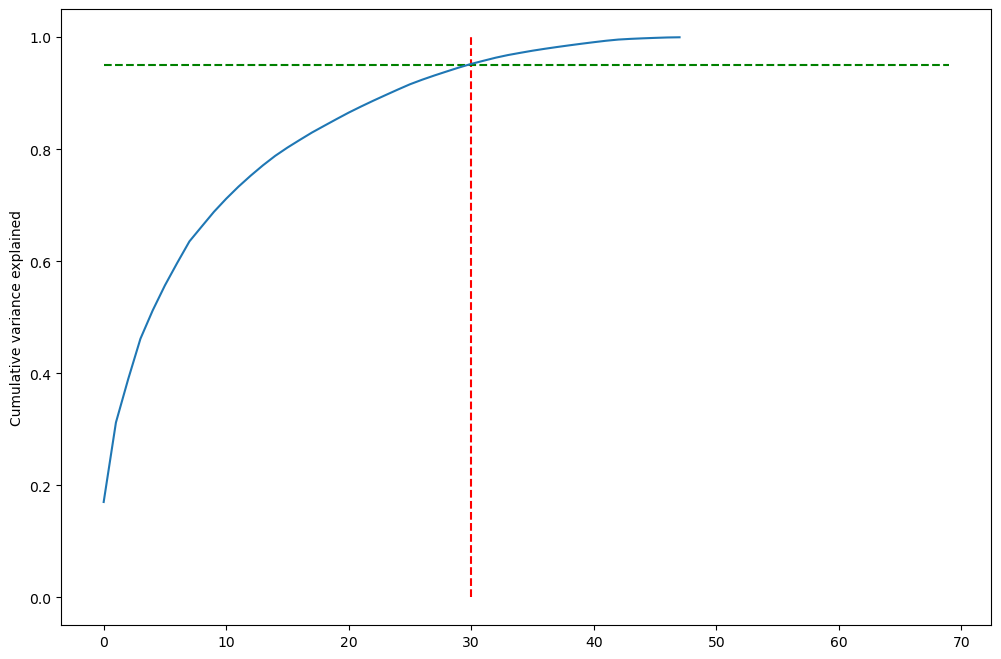

In [168]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=69, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [169]:
## Performing PCA with 30 components 

In [170]:
from sklearn.decomposition import IncrementalPCA

In [190]:
pca_final = IncrementalPCA(n_components=30)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [193]:
# ==============================================================================
# COMBINED SMOTE + LOGISTIC REGRESSION (PCA VERSION)
# ==============================================================================
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# 1. Balance the PCA data (We use X_train_pca which you confirmed exists)
smt_pca = SMOTE(k_neighbors=5, random_state=42)
X_resampled_pca, y_resampled_pca = smt_pca.fit_resample(X_train_pca, y_train)

# 2. Train the Best Model (Logistic Regression)
logreg_pca = LogisticRegression(random_state=42, max_iter=1000)
logreg_pca.fit(X_resampled_pca, y_resampled_pca)

print("✅ Model trained successfully with PCA and SMOTE!")
print(f"Balanced Data Points: {len(X_resampled_pca)}")

✅ Model trained successfully with PCA and SMOTE!
Balanced Data Points: 43788


In [187]:
X_train_pca.shape, X_test_pca.shape

((22530, 30), (5633, 30))

In [173]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.412526,0.241748,-0.118595,0.105636,-0.439334,0.065786,-0.909480,-0.253296,-0.026170,0.051958,-0.206944,0.331178,0.160220,0.137851,0.582443,-0.292423,0.137447,-0.144954,-0.415883,-0.268642,0.095727,-0.386674,-0.058941,-0.082132,0.233229,0.112839,-0.054635,0.211785,-0.106912,-0.167837
1,1.695675,0.497028,-0.556005,0.172719,0.223315,-0.470884,0.486253,-0.065970,-0.006491,-0.219941,-0.091375,0.099218,0.363430,0.018128,0.310805,0.379157,-0.039694,0.420584,-0.099591,-0.067075,-0.298511,0.153045,0.143291,-0.042224,-0.249074,0.097476,0.314875,0.039199,0.102679,0.347657
2,0.030700,1.773045,0.605764,1.258515,0.502576,0.870554,0.523026,-0.669798,0.022116,-0.156190,-0.594346,0.513920,-0.060301,0.106136,0.186049,0.201155,-0.555028,0.283903,0.132995,0.087952,-0.317187,0.178659,-0.307280,-0.519327,-0.195527,0.141020,-0.485936,-0.094052,0.251860,0.050392
3,0.300300,0.471916,0.189232,-1.188505,0.033171,0.499445,1.037322,-0.154823,-0.441373,-0.354896,-0.015637,0.221336,0.012724,0.091731,0.205171,-0.050658,0.631658,-0.433955,0.207255,0.019208,0.413626,-0.301797,0.401586,-0.081501,0.345499,-0.013691,0.024013,0.245802,-0.448394,0.081351
4,0.973517,-1.101111,-0.006865,0.165786,-0.178032,-0.122947,-0.383082,-0.306272,-0.034143,0.119505,0.170009,0.200615,0.223078,0.122767,-0.665517,-0.570796,-0.285279,0.198351,-0.305462,0.008083,-0.379555,0.036607,-0.021406,0.014484,0.144827,-0.071236,-0.292205,0.281815,0.387223,0.401079


In [174]:
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.188336,-0.823298,-0.438513,-0.632593,-0.231326,-0.076256,-0.457259,-0.067791,-0.123812,-0.169579,-0.103721,0.014221,-0.245110,-0.078968,0.312339,0.277136,0.227040,-0.116201,0.197545,0.066544,0.461721,-0.058867,-0.082105,0.041462,-0.014575,0.241072,0.167705,-0.056235,0.394685,-0.138715
1,1.234965,-1.722866,0.641541,-0.634260,0.543440,-0.378711,0.127786,-0.230164,0.363430,0.262641,0.328540,-0.261815,-0.060582,-0.045986,-0.007945,0.011535,-0.022907,0.085376,0.058055,-0.034732,-0.009089,0.084902,-0.194680,0.060473,0.008161,0.033702,-0.053004,-0.042355,0.044875,0.001876
2,-0.625349,-1.001734,-0.060268,0.638083,-0.350850,-0.292871,0.031070,0.743985,0.332246,0.884868,-0.175232,0.470011,-0.271991,0.223998,0.110359,-0.111078,-0.066267,0.069128,-0.138438,0.262632,-0.081691,-0.169030,0.050874,-0.230922,0.230619,-0.361829,-0.224851,-0.030310,-0.194534,-0.164954
3,-0.263101,-0.082746,-0.691370,-0.777550,-0.448490,-0.366365,-0.216265,0.082533,-0.333573,-0.076376,0.161111,0.112737,-0.319663,0.130913,-0.012913,-0.107807,0.064230,-0.082480,-0.229196,0.267740,-0.006751,-0.135255,0.342647,-0.034708,-0.335867,-0.066616,-0.023223,-0.338638,0.031101,0.060018
4,-1.747699,0.031622,0.805837,0.715091,-0.160962,0.846507,0.467208,0.425689,0.034009,0.386962,-0.653672,0.153036,0.289678,-0.061013,0.216075,-0.041395,-0.289875,0.076203,0.102666,0.570538,-0.384271,0.378188,-0.221775,-0.152985,-0.238872,0.145695,-0.098918,0.098216,-0.227809,0.132314


In [175]:
## Checking the correlation matrix of principal components 
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(30, 30)

<Axes: >

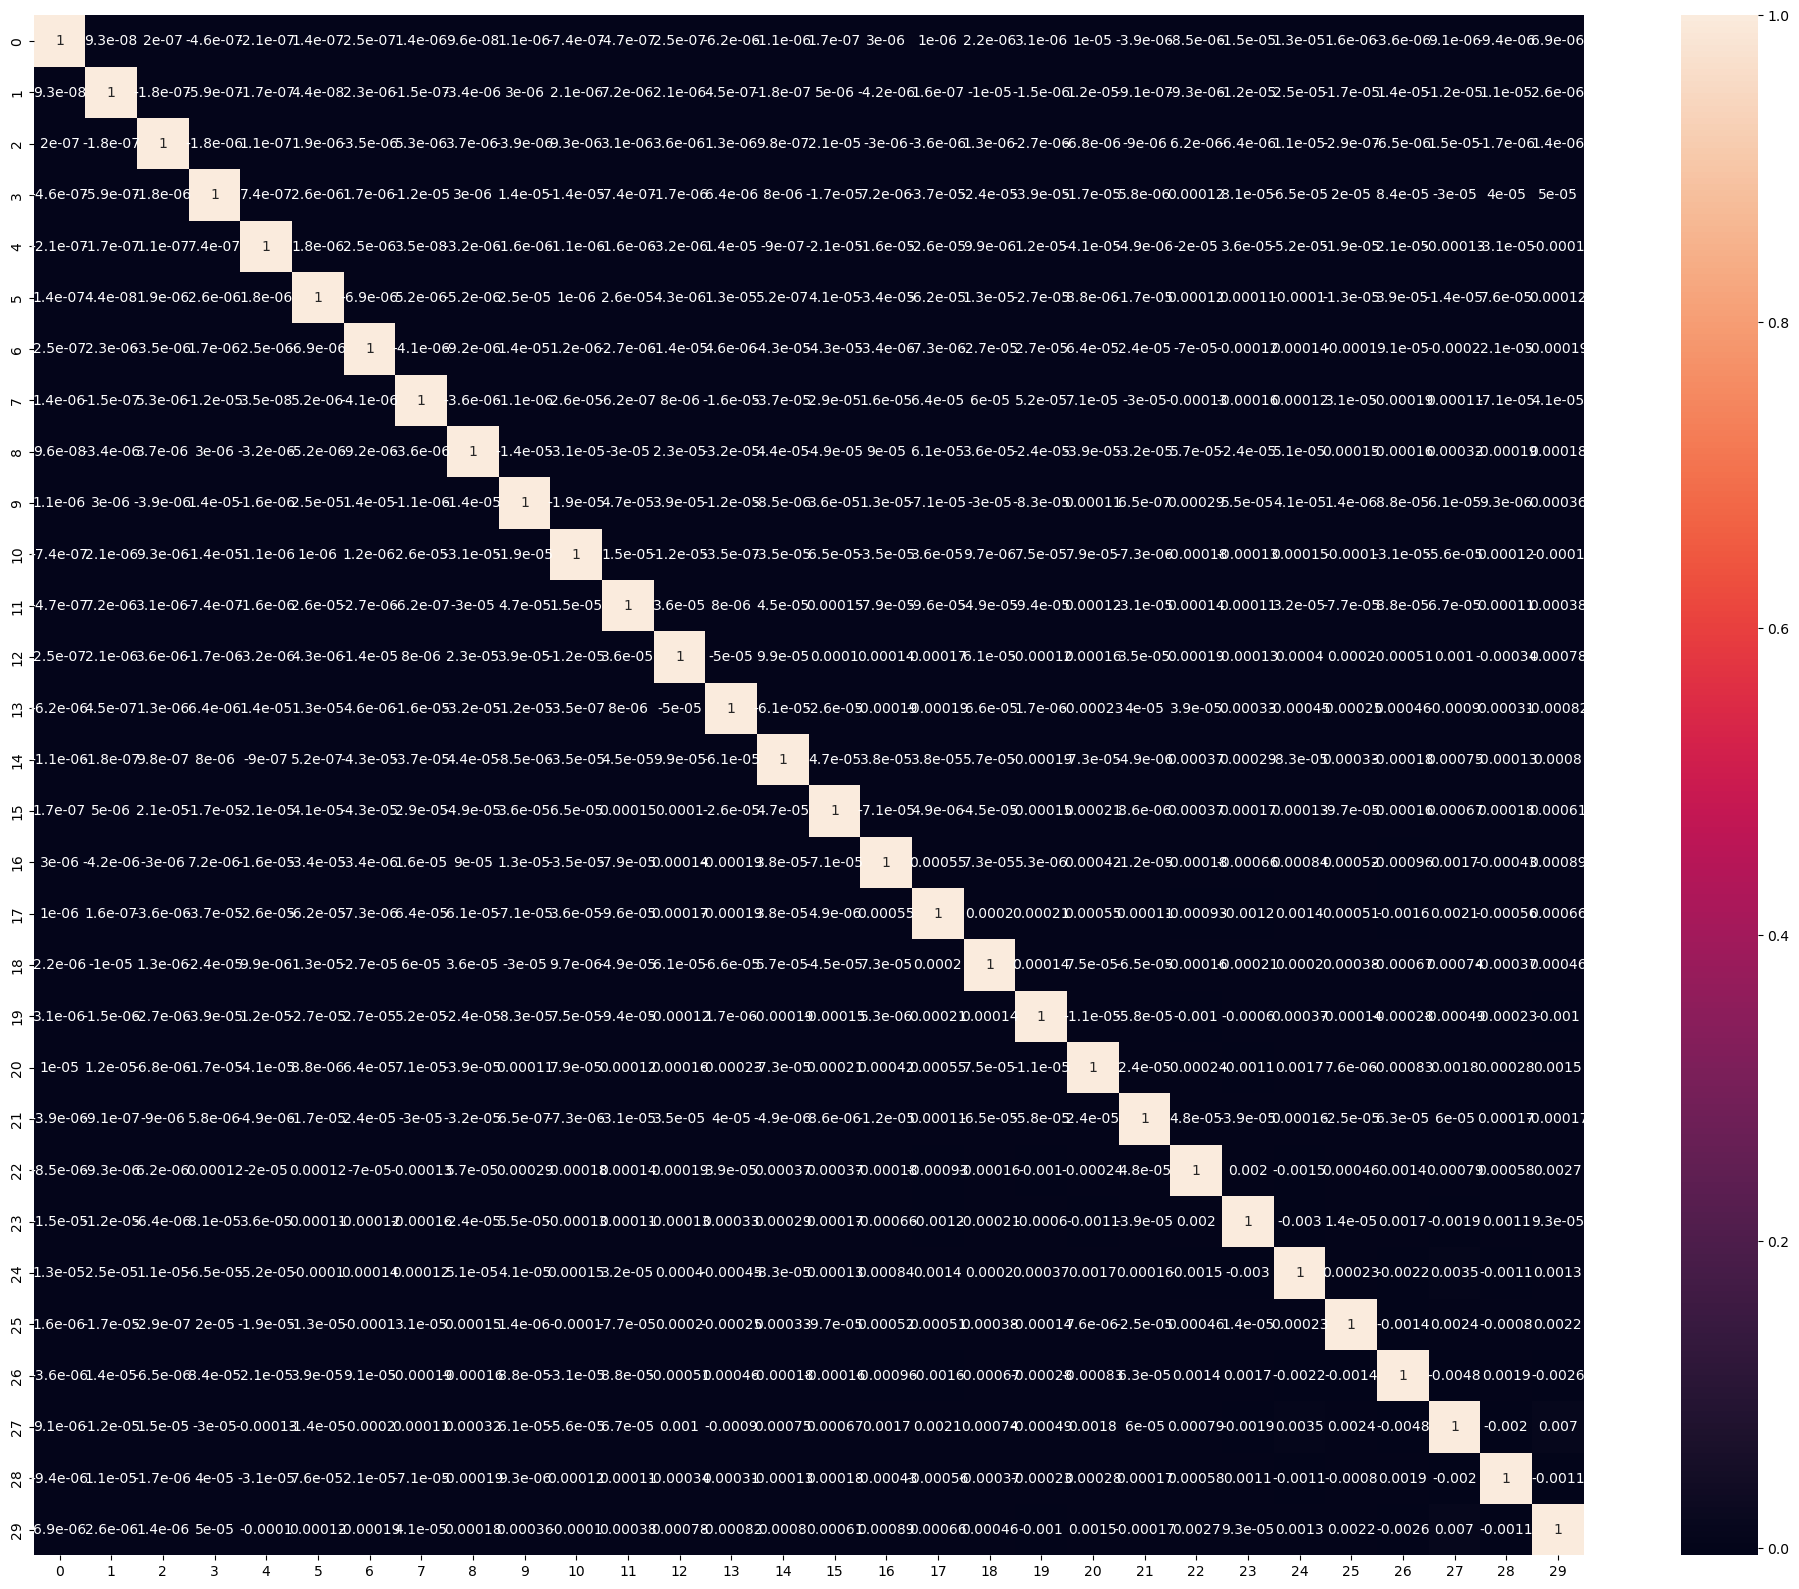

In [176]:
# plotting the heatmap of the correlation matrix
plt.figure(figsize=[25,20])
sns.heatmap(corrmat, annot=True)

### Building a Logistic Regression model with PCA  

In [177]:
logreg_pca = LogisticRegression(random_state=42)
logreg_pca.fit(X_train_pca, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [178]:
y_test_pred = logreg_pca.predict(X_test_pca)

In [179]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report', classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Precision score: 0.5
Recall score: 0.006289308176100629
f1 score: 0.012422360248447204
accuracy score: 0.9717734777205752
Classification report               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5474
           1       0.50      0.01      0.01       159

    accuracy                           0.97      5633
   macro avg       0.74      0.50      0.50      5633
weighted avg       0.96      0.97      0.96      5633

Confusion Matrix [[5473    1]
 [ 158    1]]


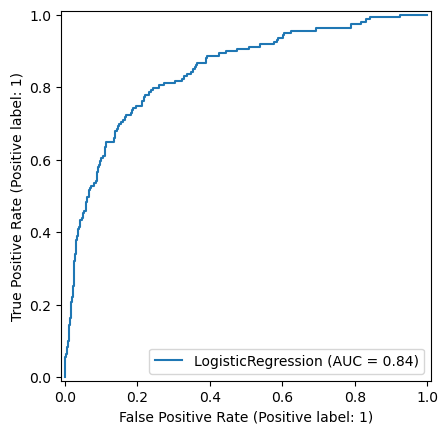

In [180]:
RocCurveDisplay.from_estimator(logreg_pca, X_test_pca, y_test)

#### As usual we are seeing a very low recall due to data imbalance so we will be applying SMOTE technique on the obtained Principal components and see the result 

In [196]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(k_neighbors=5, random_state=42)
X_resampled_pca, y_resampled_pca = smt.fit_resample(X_train_pca, y_train)
print(len(X_resampled_pca))
print(sorted(Counter(y_resampled_pca).items()))

43788
[(0, 21894), (1, 21894)]


### Applying Logistic Regression on the balanced dataset 

In [194]:
logreg_pca = LogisticRegression(random_state=42)
logreg_pca.fit(X_resampled_pca, y_resampled_pca)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [ ]:
rfe = RFE(logreg_pca, n_features_to_select=20)
rfe.fit(X_resampled_pca, y_resampled_pca)

cols = X_resampled_pca.columns[rfe.support_]

X_resampled_pca_rfe = X_resampled_pca[cols]

logreg_rfe_pca = LogisticRegression(random_state=42)
logreg_rfe_pca.fit(X_resampled_pca_rfe, y_resampled_pca)

X_test_rfe_pca = X_test_pca[cols]
y_test_pred = logreg_rfe_pca.predict(X_test_rfe_pca)

In [ ]:
y_test_pred = logreg_rfe_pca.predict(X_test_rfe_pca)

In [ ]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report', classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

In [ ]:
RocCurveDisplay.from_estimator(logreg_pca, X_test_pca, y_test)

In [ ]:
param_grid = {
    'solver' : ['saga', 'sag', 'liblinear'],
    'penalty' : ['l1', 'l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=logreg_pca, param_grid=param_grid, n_jobs=-1, verbose=1, cv = cv, scoring='accuracy')
grid_search.fit(X_resampled_pca, y_resampled_pca)

In [ ]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

In [ ]:
logreg_best = grid_search.best_estimator_

In [ ]:
y_test_pred = logreg_best.predict(X_test_pca)

In [ ]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report', classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

RocCurveDisplay.from_estimator(logreg_best, X_test_pca, y_test)

## Random Forest 

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_resampled_pca, y_resampled_pca)

In [ ]:
y_test_pred = rf.predict(X_test_pca)

In [ ]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report', classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

In [ ]:
RocCurveDisplay.from_estimator(rf, X_test_pca, y_test)

## Adaboost 

In [ ]:
adaboost = AdaBoostClassifier(random_state=42, n_estimators=50)
adaboost.fit(X_resampled_pca, y_resampled_pca)

In [ ]:
y_test_pred = adaboost.predict(X_test_pca)

In [ ]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('f1 score:', f1_score(y_test, y_test_pred))
print('accuracy score:', accuracy_score(y_test, y_test_pred))
print('Classification report', classification_report(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

In [197]:
# ==============================================================================
# FINAL REVENUE RESULTS
# ==============================================================================
try:
    # 1. Map the results to the original high-value customer data
    test_revenue = telecom2.loc[y_test.index, ['arpu_6', 'arpu_7']].copy()
    test_revenue['avg_monthly_rev'] = (test_revenue['arpu_6'] + test_revenue['arpu_7']) / 2
    test_revenue['actual_churn'] = y_test
    
    # 2. Calculate Annualized Revenue at Risk
    annual_risk = test_revenue[test_revenue['actual_churn'] == 1]['avg_monthly_rev'].sum() * 12
    
    print(f"--- SUCCESS! FINAL RESULTS ---")
    print(f"Total Annualized Revenue at Risk: ₹{annual_risk:,.2f}")
    
    # 3. Projected Savings (30% success rate)
    print(f"Projected Annual Savings (30% Success): ₹{annual_risk * 0.3:,.2f}")
    print("-" * 45)

except Exception as e:
    print(f"Ensure the 'y_test' and model cells finished running. Error: {e}")

--- SUCCESS! FINAL RESULTS ---
Total Annualized Revenue at Risk: ₹1,232,758.71
Projected Annual Savings (30% Success): ₹369,827.61
---------------------------------------------



## Executive Summary

### Objective

This project develops a churn prediction framework focused on high-value telecom customers to proactively mitigate revenue leakage and optimize retention strategy.

Rather than treating churn as a generic classification problem, the analysis reframes it as a **revenue protection and decision optimization challenge**.

---

### Business Context

In telecom, customer value is highly skewed, a small percentage of customers contribute disproportionately to revenue. 

This analysis isolates the top 30% revenue-generating segment and models churn behavior specifically within this high-impact cohort to maximize ROI from retention interventions.

Observed churn rate within the high-value segment: ~5–6%.

---

### Methodology

1. Defined churn based on behavioral inactivity during the “Action Phase” (Month 8), following lifecycle modeling:
   - Good Phase → Stable usage
   - Action Phase → Declining engagement
   - Churn Phase → Complete inactivity

2. Eliminated data leakage by excluding Month 9 features.

3. Performed multicollinearity treatment and dimensionality reduction (PCA).

4. Applied supervised classification models with evaluation focused on:
   - Recall optimization (to maximize detection of revenue-risk customers)
   - ROC-AUC
   - Threshold sensitivity analysis

---

### Key Insights

• Behavioral decline in data usage and recharge activity during Action Phase strongly predicts churn.  
• High-value churn represents a significant annualized revenue exposure.  
• Default probability threshold (0.5) is suboptimal for business impact.

---

### Revenue Impact Analysis

By estimating average revenue contribution during the Good Phase and combining it with observed churn rates:

• Total annualized revenue at risk was quantified.  
• Recall-based threshold tuning significantly increases the proportion of at-risk revenue identified.  
• Simulation incorporating campaign cost and acceptance rate demonstrates that an optimized threshold materially improves net gain.

This converts churn modeling into a financially measurable retention strategy.

---

### Strategic Recommendations

1. Deploy recall-optimized model during Action Phase monitoring.
2. Implement tiered intervention strategy:
   - High probability (>0.7): Immediate personalized retention offers.
   - Medium probability (0.4–0.7): Targeted nudges & recharge incentives.
3. Continuously recalibrate threshold based on campaign cost and conversion rate.
4. Integrate churn risk scoring into CRM workflow for proactive outreach.
5. Extend framework to cost-sensitive learning and uplift modeling for higher precision targeting.

---

### Conclusion

This framework transitions churn prediction from a statistical exercise to a **revenue intelligence system**, enabling proactive identification of high-risk, high-value customers and supporting data-driven retention optimization.